In [31]:
# Annual Population Change 1993-2023 Last 30 years ın Ireland
# As previous datas , how will be annual population for 2024 
# As previous datas , next year 2024 how many immigrants will have welcomed in Ireland ?
# As previous datas , next year 2024 how many emigrants will have left than Ireland ?
# If the Government decides to keep stabil Ireland population in 2024 , how many immigrants they can accept ?

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries are used .

In [35]:
data=pd.read_csv('PEA15.20231021T091018.csv') #data is read .

In [36]:
data #data is showed .

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [37]:
data.head #data head 5 rows are displayed .

<bound method NDFrame.head of               STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]>

In [6]:
data.head(8) #Why I have chosed just 8 rows cause of different components . We have different components which are settled on 8 rows .

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1


We can examine componenets at 1993 ; annual births , annual deaths , natural increase , immigrants Emigrants , net migration , population change , population

I am aim to find how changed Ireland population at last 30 years and I am gonna predict about next year population by last 30 years datas; will population increase or not ? During this time we are gonna see correlations between values which feed population change .
If the government wanna keep population as same as last year 2023 for 2024 , how should be difference for accepting immigrants in 2024 ? 

In [7]:
data.shape #We can have a look data shape . In this data we have 248 rows and 5 columns .

(248, 5)

In [38]:
data.describe() #We can learn how many variables we have and max value or min value or more

,Year,VALUE
count,248.000000,248.000000
mean,2008.000000,582.497581
std,8.962359,1434.688854
min,1993.000000,-27.500000
25%,2000.000000,29.800000
50%,2008.000000,48.350000
75%,2016.000000,73.300000
max,2023.000000,5281.600000


In [39]:
data.describe(include=object) #We can search datas detailly here . As you can see , for example we can understand how many unique or frequency values

,STATISTIC Label,Component,UNIT
count,248,248,248
unique,1,8,1
top,Annual Population Change,Annual births,Thousand
freq,248,31,248


In [40]:
data.info() #We can have an idea about our data . How many floats , integers or objects we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  248 non-null    object 
 1   Year             248 non-null    int64  
 2   Component        248 non-null    object 
 3   UNIT             248 non-null    object 
 4   VALUE            248 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ KB


After all , before I start I have to be sure there is no missing data . Unless I have any missing data , I can start reading data but ıf I have and I start reading datas , I could arrive meaningless results . For preventing our result , I should detect them and have to find a solution . What kind of solutions I have and which actions I can take ? 
I can chance them as ' 0' , 
I can take value from another randomly slected sample , 
I can use mean or median , 
I can use interpolate .
After I take one of them ways , I can start to read my datas to predict my goal .

In [11]:
null_filter_i = data.isnull()  #I am having look is there any gap in this data . If we have it which seems True .

In [12]:
null_filter_i.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [13]:
null_filter_i.shape


(248, 5)

In [14]:
null_filter_i.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

In [15]:
null_filter_n=data.notnull()

In [16]:
null_filter_n.head(15)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [17]:
null_filter_n.shape

(248, 5)

In [18]:
null_filter_n.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

If we had missing datas , we could have found them as below as separetly having look all columns .

In [41]:
null_filter_statıstıc = data['STATISTIC Label'].isnull() 
null_filter_statıstıc.head(15)

#We are having look do we have missign datas for Statıstıc Label column or not . We could do this investigation for all columns individually .

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: STATISTIC Label, dtype: bool

In [42]:
print(data[null_filter_statıstıc].shape)

#To be plus , we can have a look missing datas shapes and it can say us , ıs there any missing data or not .

(0, 5)


After all controls we are sure we do not have any missing data and we can start to read our datas for reacing answer of our questions .

In [43]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [44]:
#After all I clearly know my data has no missing datas and beside that I know values are thousand . Therefore I wanna drop this column for discreasing datas . Because when you work over the datas , many columns can bring complicated issues and complex approachings . So , I can drop column which is thought unnecessary for me .

In [45]:
to_drop_unit=['UNIT']   #I have choosen whıch column I wanna drop and I made up new name for it .
data.drop(to_drop_unit,inplace=True,axis=1)  #I have used this name and dropped this column from data . ( UNIT)

In [46]:
data.head() #We can be sure drop command worked as normal as we expect

,STATISTIC Label,Year,Component,VALUE
0,Annual Population Change,1993,Annual births,50.4
1,Annual Population Change,1993,Annual deaths,30.4
2,Annual Population Change,1993,Natural increase,20.0
3,Annual Population Change,1993,Immigrants,34.7
4,Annual Population Change,1993,Emigrants,35.1


In [48]:
data.shape #We can notice than here we have already dropped one column

(248, 4)

And now we can bring Ireland population for last 30 years . Our all questions will have replied over these years datas .

In [49]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population")
year_1993_2023_population = data[filtre]
values_population = year_1993_2023_population['VALUE']
print(values_population)

7      3574.1
15     3585.9
23     3601.3
31     3626.1
39     3664.3
47     3703.1
55     3741.6
63     3789.5
71     3847.2
79     3917.2
87     3979.9
95     4045.2
103    4133.8
111    4232.9
119    4375.8
127    4485.1
135    4533.4
143    4554.8
151    4574.9
159    4593.7
167    4614.7
175    4645.4
183    4687.8
191    4739.6
199    4810.9
207    4884.9
215    4958.5
223    5029.9
231    5074.7
239    5184.0
247    5281.6
Name: VALUE, dtype: float64


As you see numbers , population is going up every year . But also we have another way to show it . Another way is to explain it plot/bar/heatmap visualising .

Let's have a look plot displaying .

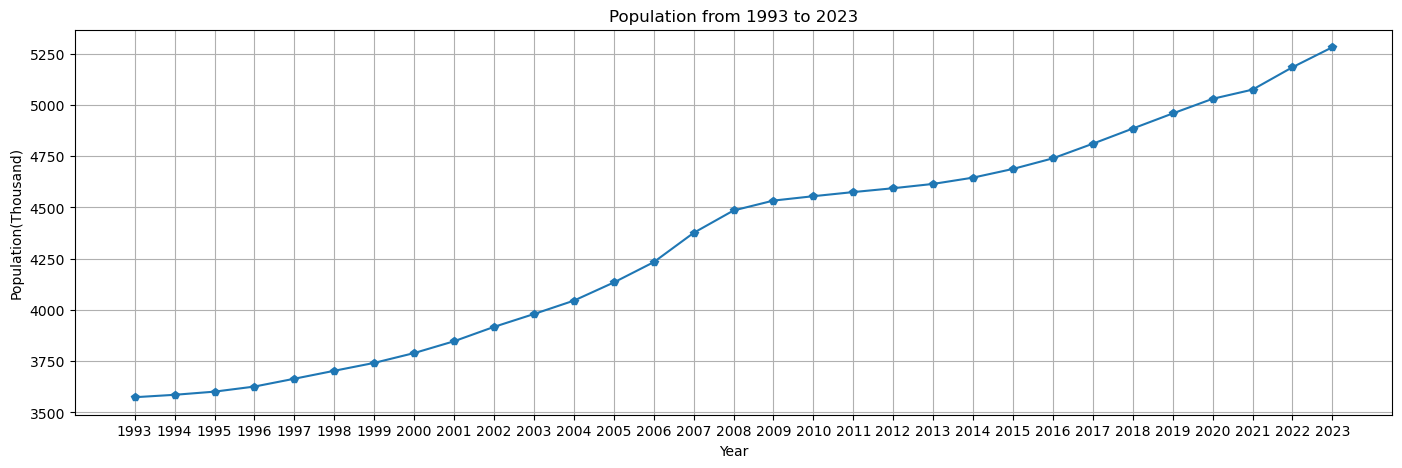

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population') #Population are selected .
population_data= data[filtre] #name is created 
values = population_data['VALUE'] #Variables are defined
years = population_data['Year'] #Variables are defined

plt.figure(figsize=(17, 5)) #Displaying size is adjusted .
plt.plot(years, values , marker='p') #Values are borught and crashing places are marked 
plt.title("Population from 1993 to 2023") #Title name is given
plt.xlabel("Year") #X label name is given
plt.ylabel("Population(Thousand)") #Y label name is given
plt.grid(True) #Grid are assigned
plt.xticks(years) #Years are extended .

plt.show() #Plot ise showed .

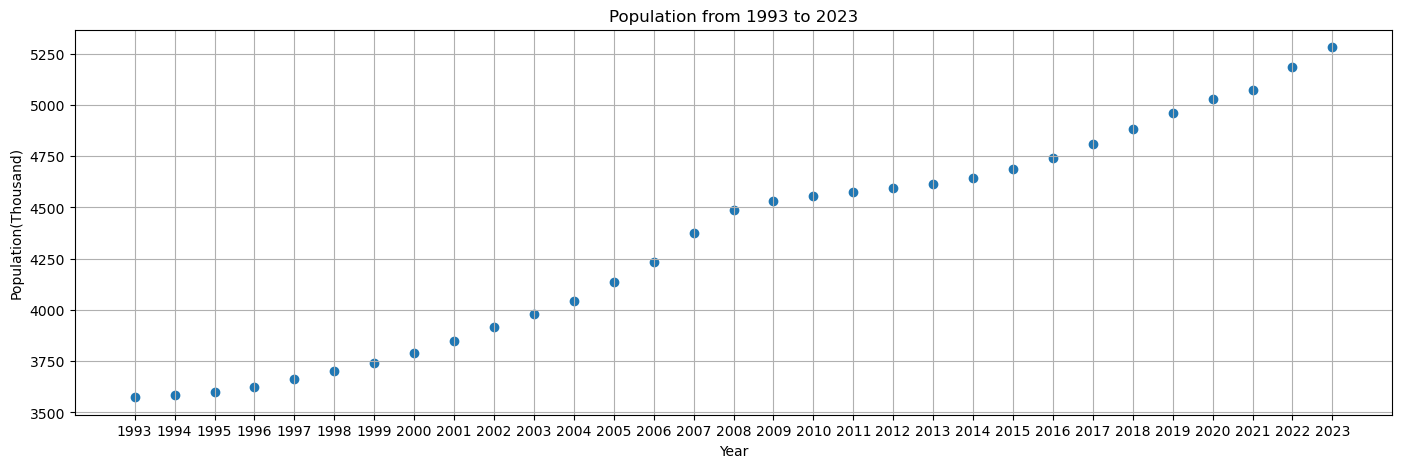

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population') #Population are selected .
population_data= data[filtre] #name is created 
values = population_data['VALUE'] #Variables are defined
years = population_data['Year'] #Variables are defined

plt.figure(figsize=(17, 5)) #Displaying size is adjusted .
plt.scatter(years, values ,) #Values are borught and crashing places are marked 
plt.title("Population from 1993 to 2023") #Title name is given
plt.xlabel("Year") #X label name is given
plt.ylabel("Population(Thousand)") #Y label name is given
plt.grid(True) #Grid are assigned
plt.xticks(years) #Years are extended .

plt.show() #Plot ise showed .

Let's have a look bar displaying .

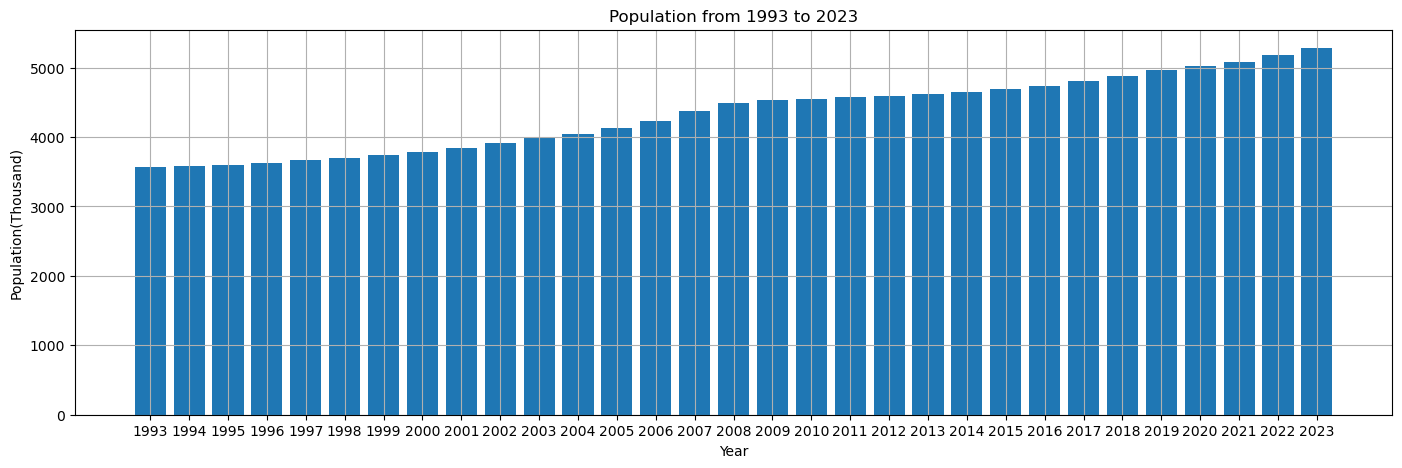

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population') 
population_data= data[filtre] 
values = population_data['VALUE'] 
years = population_data['Year'] 

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Population from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Population(Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's have a look heatmap displaying 

C:\Users\HP\AppData\Local\Temp\ipykernel_10216\2661915652.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = population_data.pivot('Year', 'Component', 'VALUE' , )


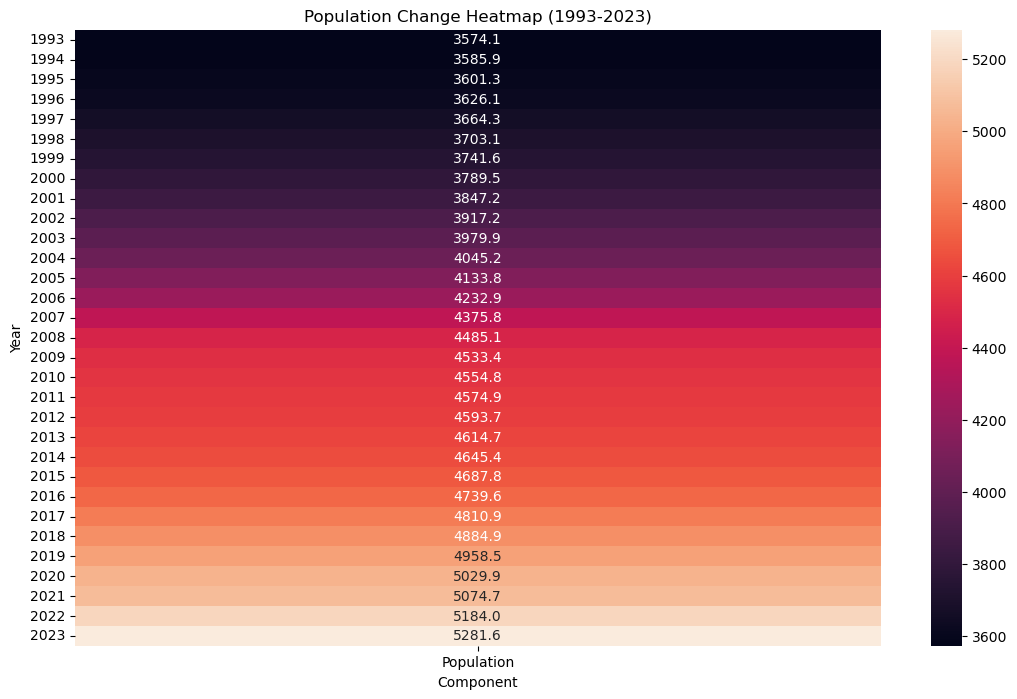

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population')
population_data = data[filtre]
heatmap_data_1993_2023 = population_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title('Population Change Heatmap (1993-2023)')
plt.show()

Let's see Natural Increase datas being plot .

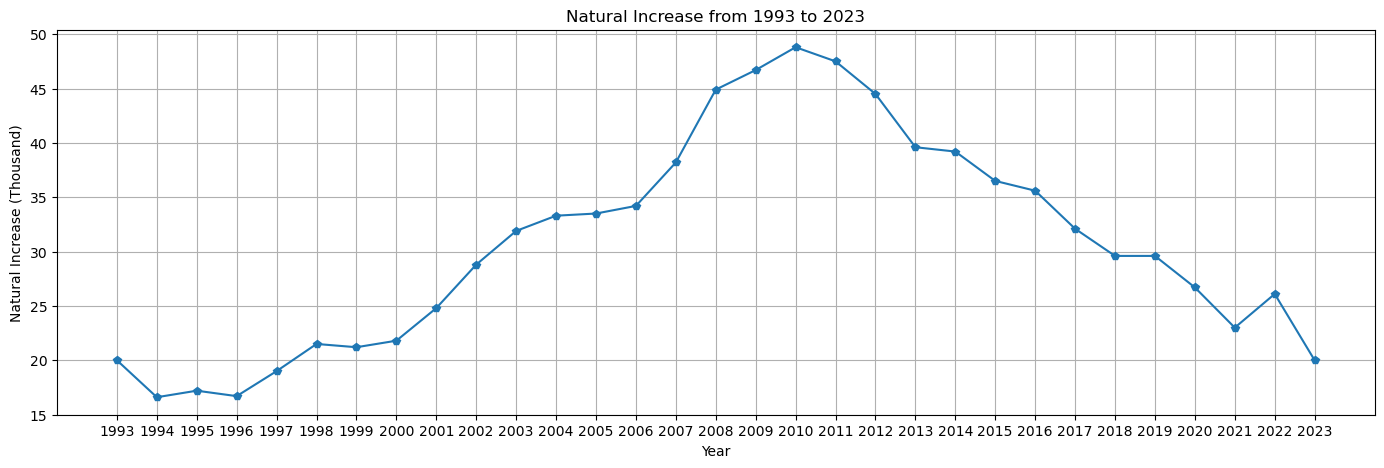

In [31]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase') #Natural İncreaes are selected .
natural_increase_data= data[filtre] #name is created 
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural Increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Natural Increase datas being bar .

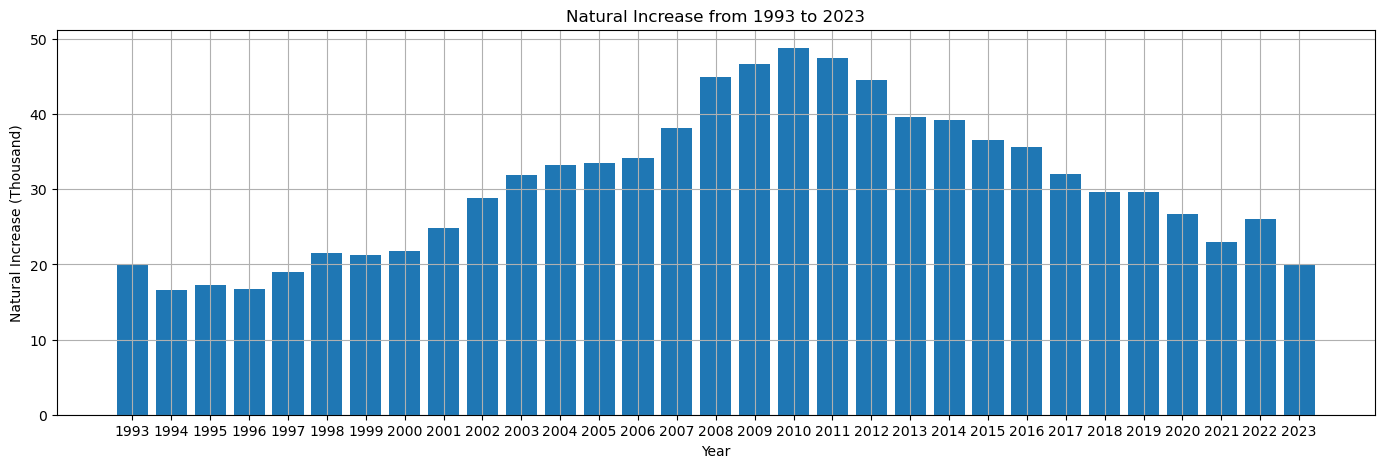

In [32]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase')
natural_increase_data= data[filtre] #name is created 
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural Increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Natural Increase datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\3464095025.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = natural_increase_data.pivot('Year', 'Component', 'VALUE' , )


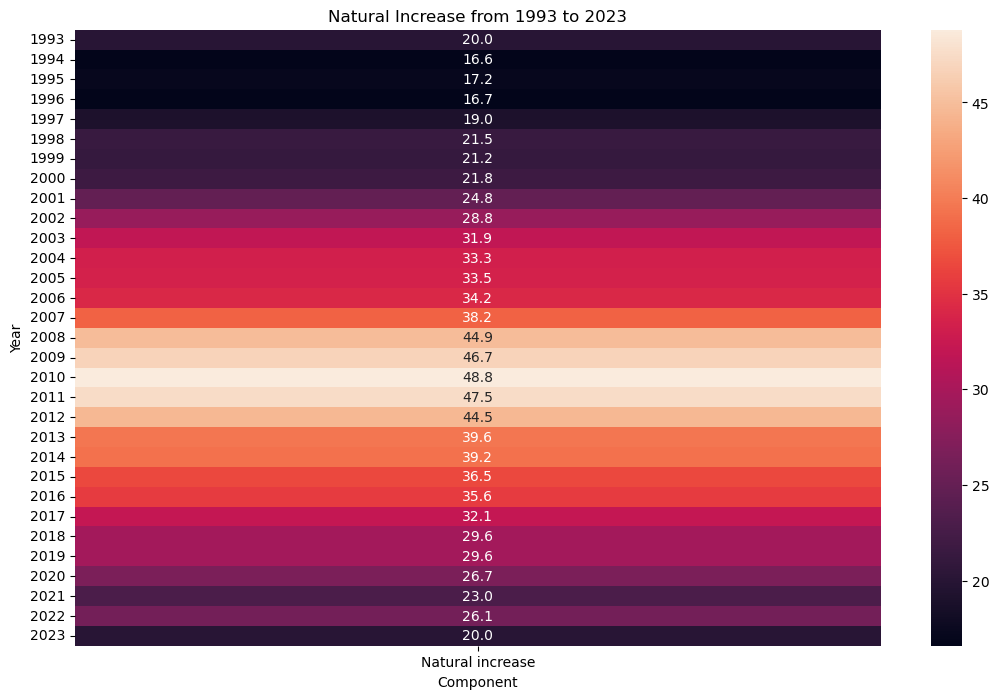

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase')
natural_increase_data = data[filtre]
heatmap_data_1993_2023 = natural_increase_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Natural Increase from 1993 to 2023")
plt.show()

After all displaying we can say that there is no regular increasing for natural increase but we sincerely can say that every year natural increases are positive . What does it mean ? We are able to claim that population is fed by natural increase . As we have seen , strongly or weakly , every year annual births are more than annual deaths . Therefore there is no minus value on our graphs . This natural increase was in top at 2010 and was bottom at 1994 .

Let's see Net Migration datas being plot .

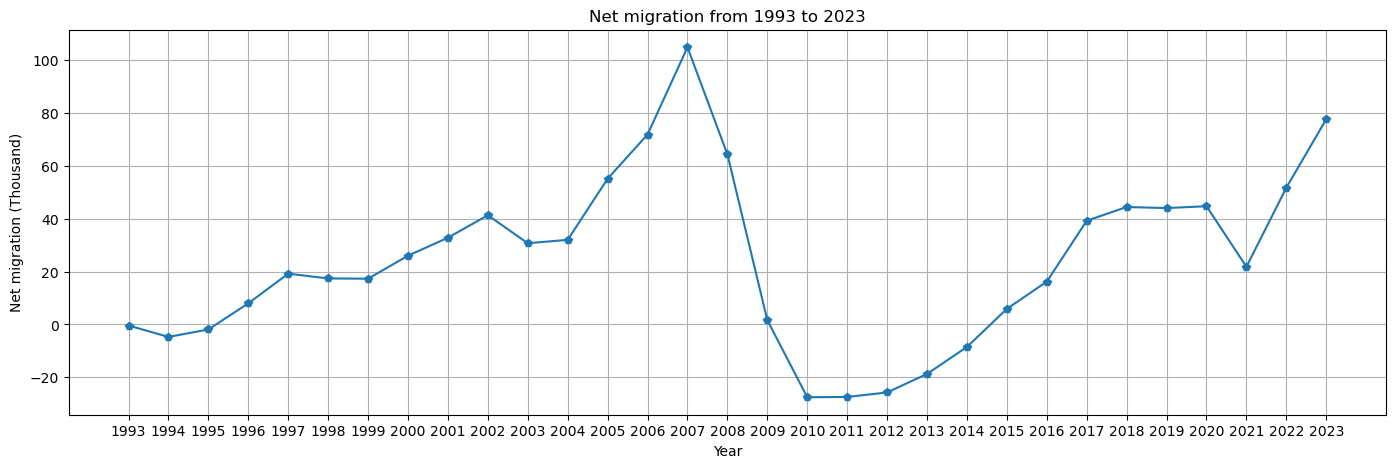

In [34]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") #Net migration is selected 
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Net Migration datas being bar .

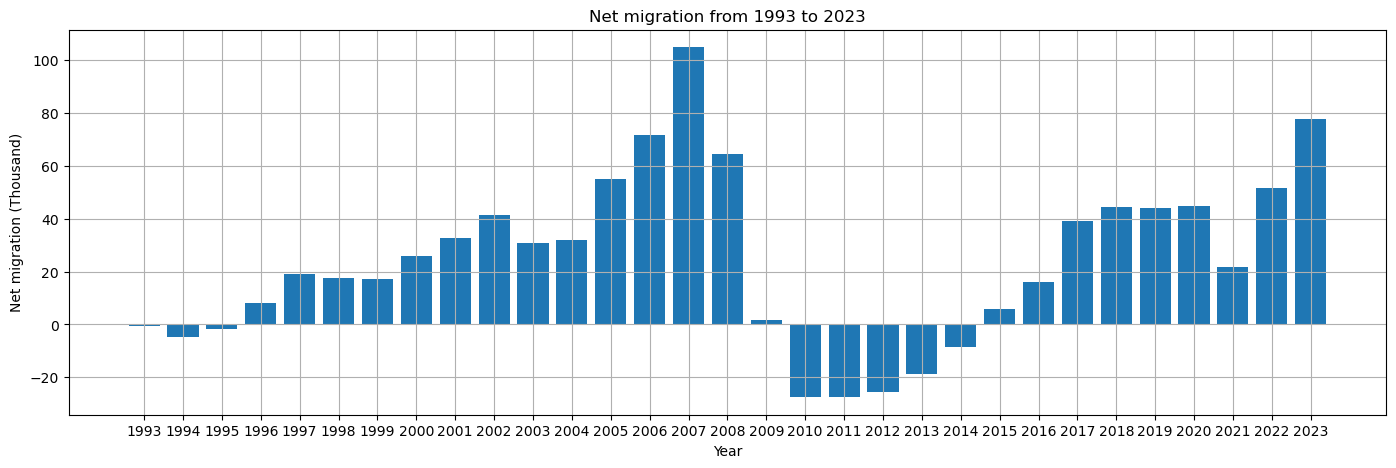

In [35]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") 
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Net Migration datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\3254265349.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = net_migration_data.pivot('Year', 'Component', 'VALUE' , )


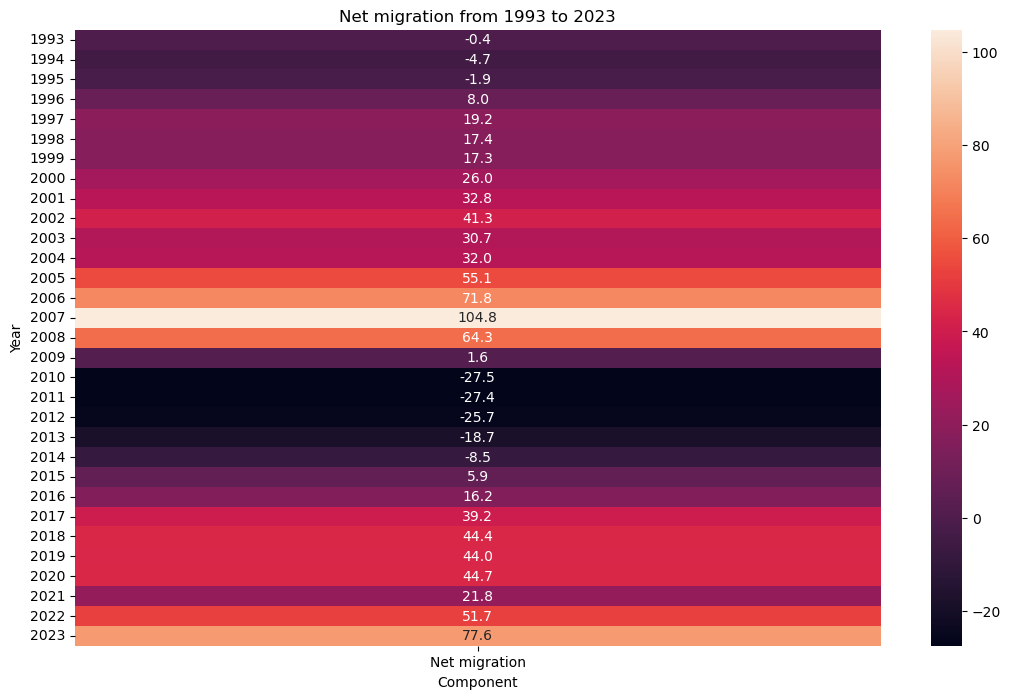

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") 
net_migration_data= data[filtre]
heatmap_data_1993_2023 = net_migration_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Net migration from 1993 to 2023")
plt.show()

When we have a look Net migration graphs , directly to say something about regular increasing or discreasing is too hard . Because as you have seen after 2009 until 2015 net migration has minus values . What does it mean ? Magnitude of immigrations are more than magnitude of emigrants . This value is max at 2007 and min is at 2010 . And also 2023 is second big value for net migration . Let's see separately immigrations and emigrants values . 

Let's see immigrants datas being plot .

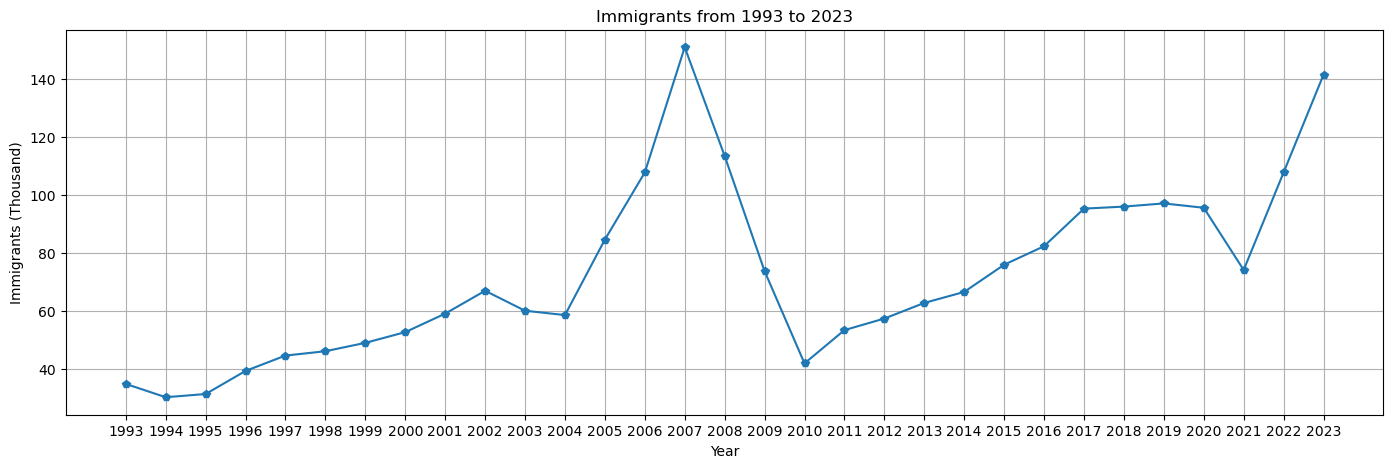

In [37]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants") #Immigrants are selected .
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see immigrants datas being bar .

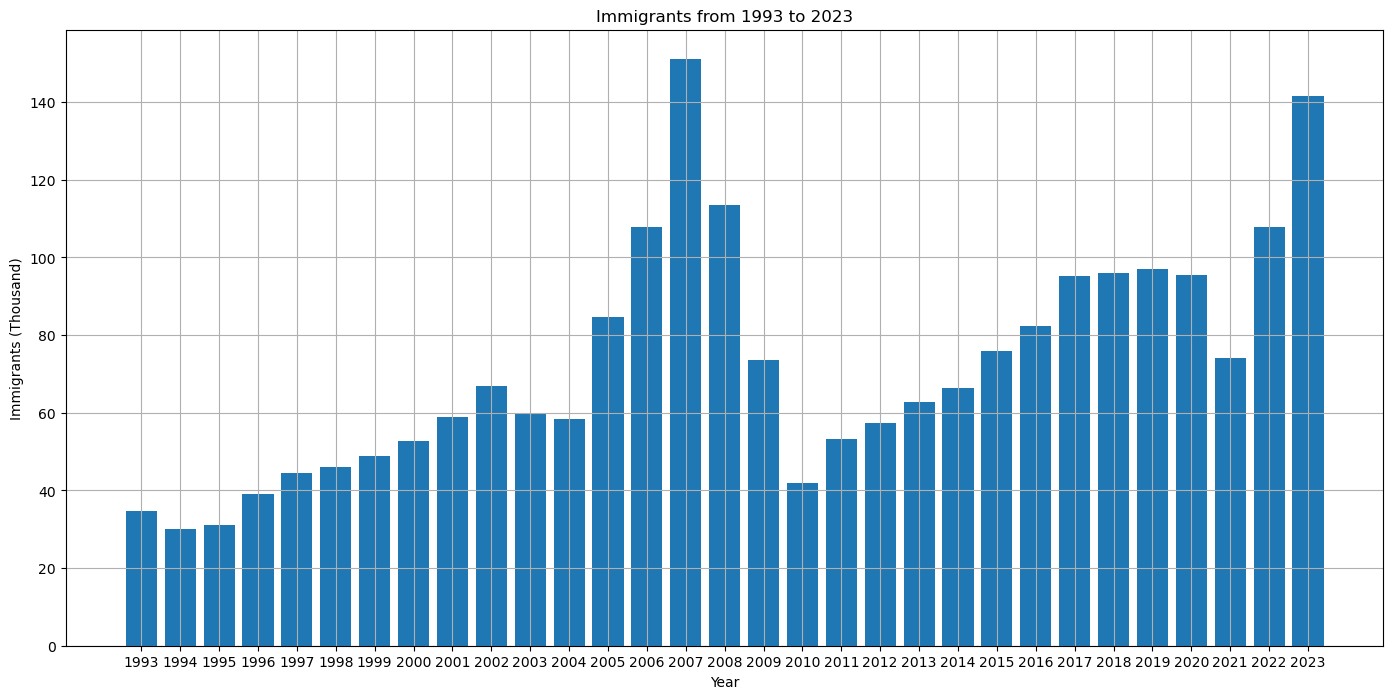

In [38]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants") 
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.bar(years, values )
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see immigration datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\1210600470.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = immigrants_data.pivot('Year', 'Component', 'VALUE' , )


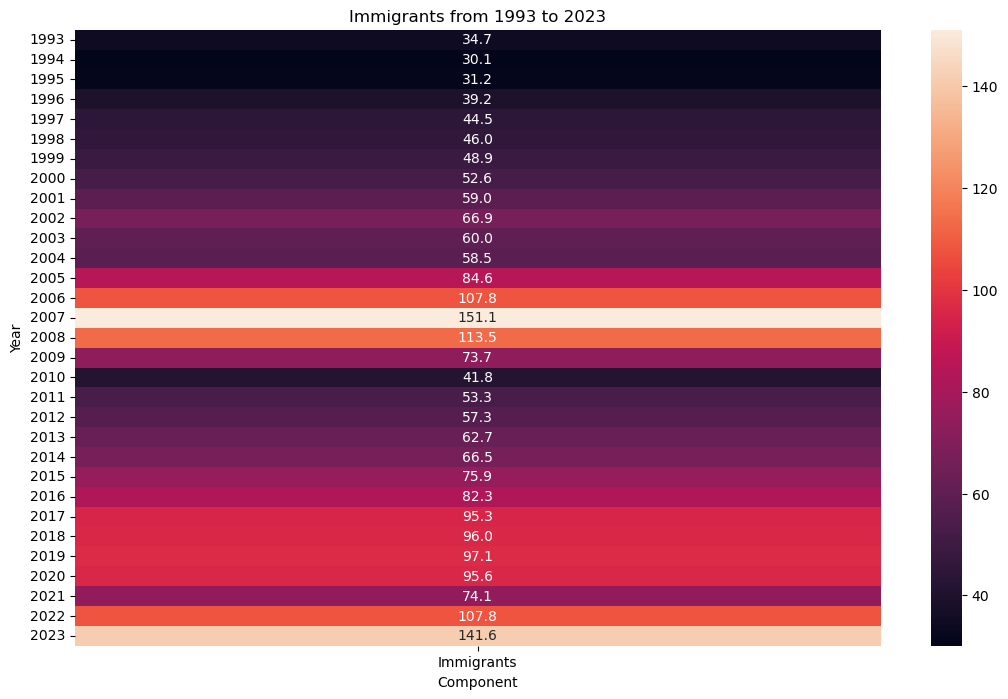

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants")
immigrants_data= data[filtre]
heatmap_data_1993_2023 = immigrants_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Immigrants from 1993 to 2023")
plt.show()

As we can see , if we ignore 1993-1997 , that's obvious every year Ireland accepts more than 40.000 immigrants . At 2007 immigrants are max and second max value is settled at 2023 . When we have a look net migration values , we are able to understand that they are parallel . They have pig at same year . 

Let's see emigrants datas being plot .

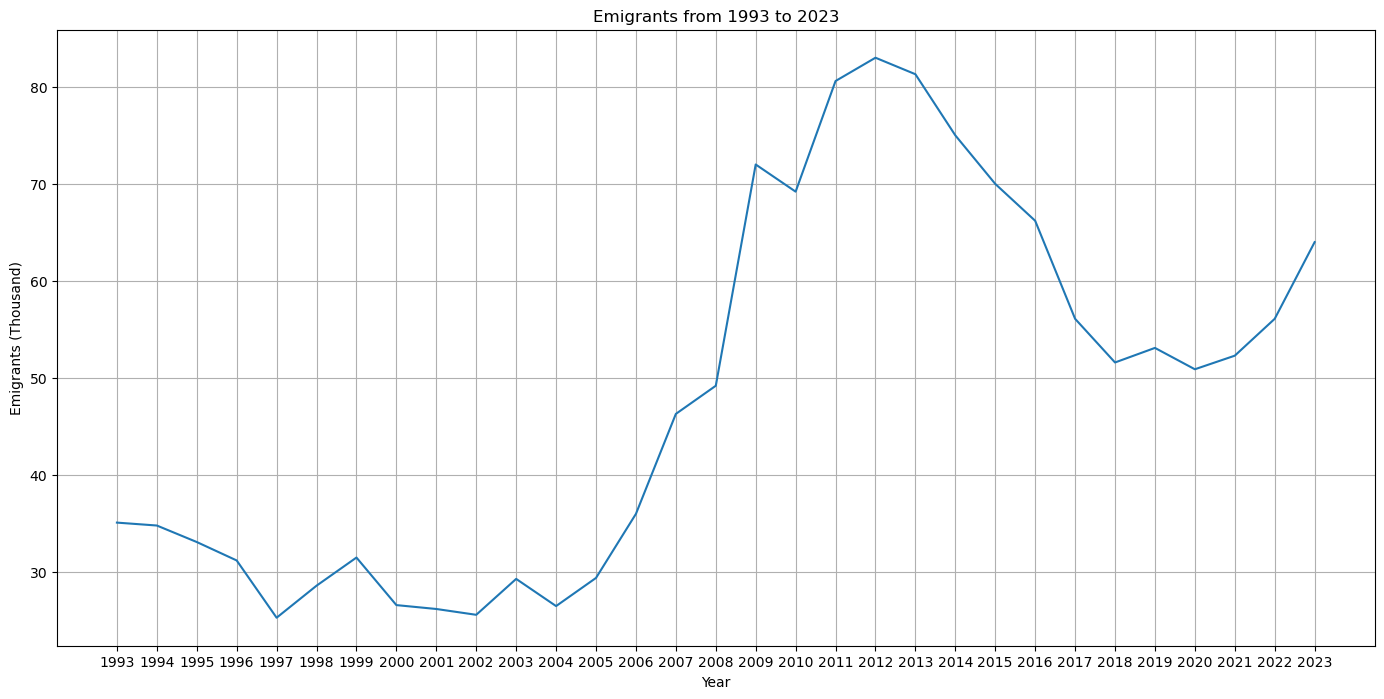

In [40]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") #Emigrants were chosen .
emigrants_1993_2023= data[filtre]
values = emigrants_1993_2023['VALUE']
years = emigrants_1993_2023['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see emigrants datas being bar 

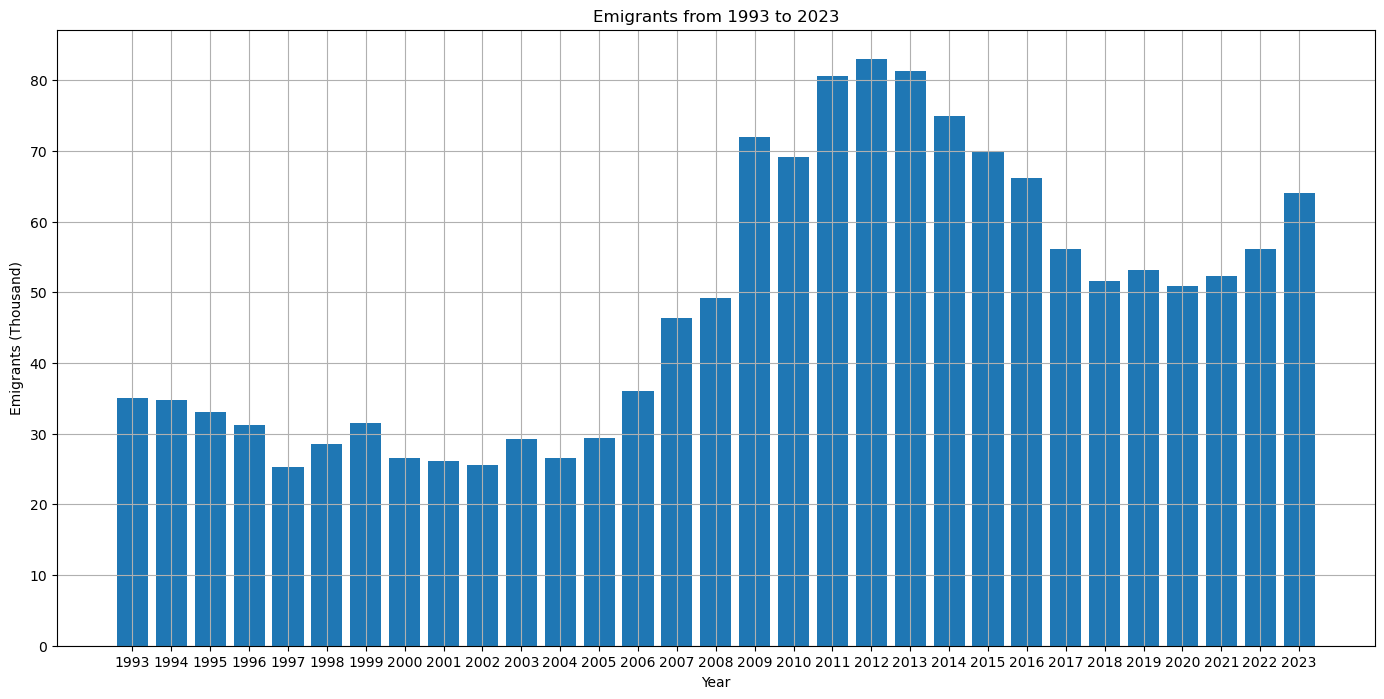

In [41]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") #Emigrants were chosen .
emigrants_1993_2023= data[filtre]
values = emigrants_1993_2023['VALUE']
years = emigrants_1993_2023['Year']

plt.figure(figsize=(17, 8))
plt.bar(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see emigrants datas being heatmap.

C:\Users\HP\AppData\Local\Temp\ipykernel_14288\157768633.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = emigrants_1993_2023.pivot('Year', 'Component', 'VALUE' , )


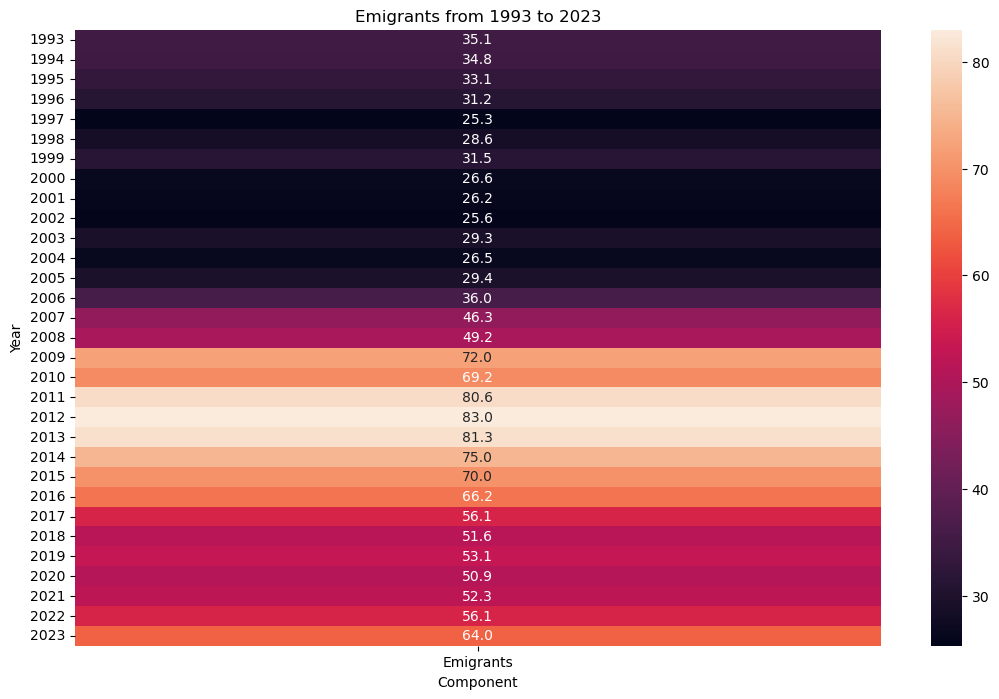

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") 
emigrants_1993_2023= data[filtre]
heatmap_data_1993_2023 = emigrants_1993_2023.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Emigrants from 1993 to 2023")
plt.show()

As we can see , every year Ireland looses more than 25.000 emigrants . At 2012 emigrants are max and min value is settled at 1997 . When we have a look net emigrants values , we are able to understand that last 3 years magnitude of emigrants are going up . But to say something regularly increase is hard . Values are irregular and every year they change.

Let's see ın last 30 years , immigrants and emigrants together . We can see clearly what kind of correlation they have .

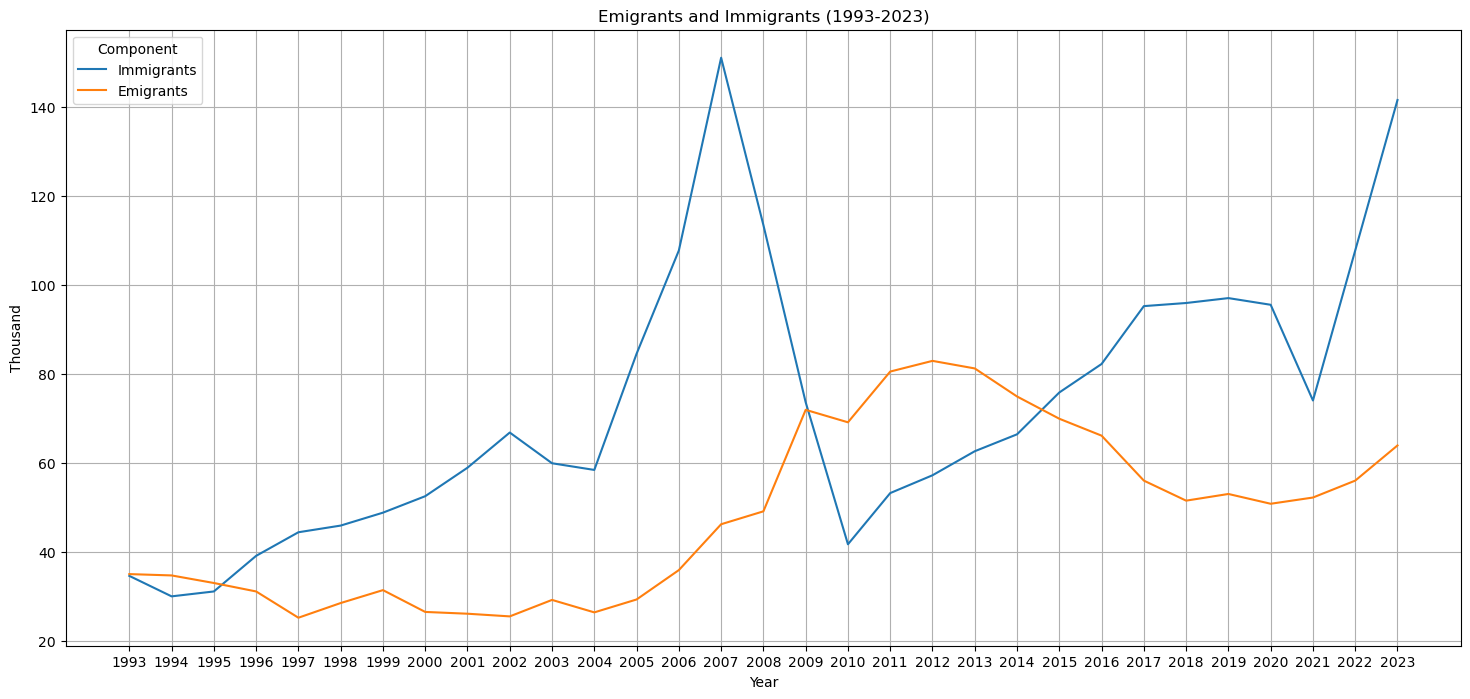

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Emigrants', 'Immigrants']))
emigrants_immigrants_display_data = data[filtre]

plt.figure(figsize=(18, 8))
sns.lineplot(x='Year', y='VALUE', hue='Component', data=emigrants_immigrants_display_data)
plt.title('Emigrants and Immigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.grid(True)
plt.xticks(years)
plt.show()

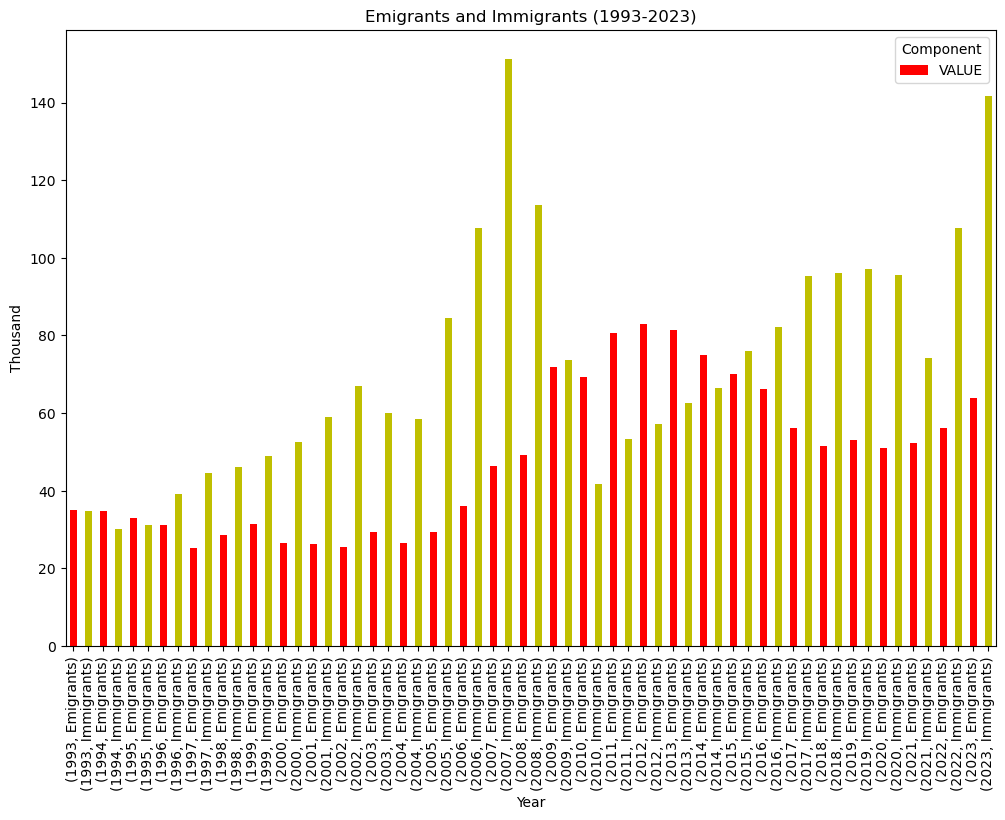

In [44]:
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Emigrants', 'Immigrants']))
emigrants_immigrants_display_data = data[filtre]
grouped_data = emigrants_immigrants_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y'] #For values colors are assigned . Emigrants will showed by red color , immigrants will showed by yellow color .

grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Emigrants and Immigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.show()

We can see above what kind of correlation in last 30 years they have between 'Emigrants and Immigrants' . 

Let's see ın last 30 years , 'Natural increase and Net migration' together . We can see clearly what kind of correlation they have .

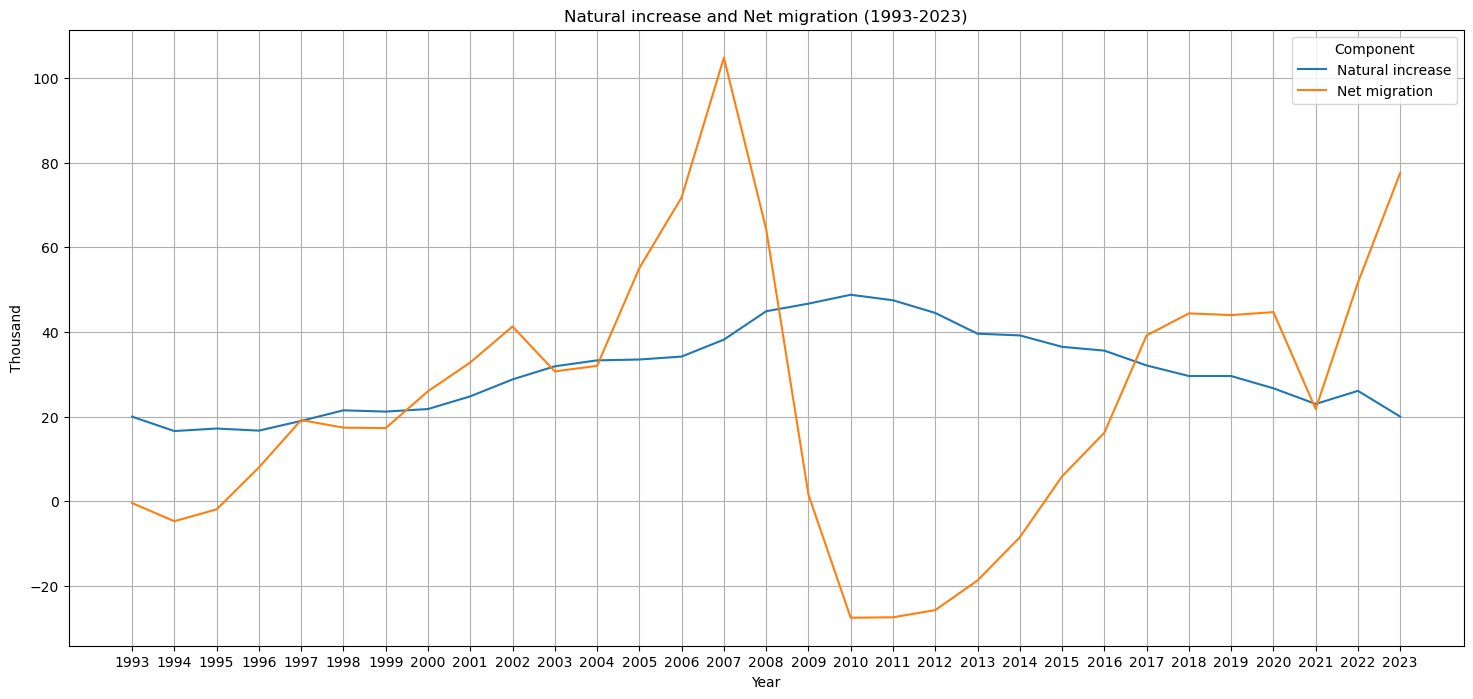

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Natural increase', 'Net migration']))
natural_increase_net_migration_display_data = data[filtre]
grouped_data = natural_increase_net_migration_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y']
plt.figure(figsize=(18, 8))
sns.lineplot(x='Year', y='VALUE', hue='Component', data=natural_increase_net_migration_display_data)
plt.title('Natural increase and Net migration (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.grid(True)
plt.xticks(years)
plt.show()

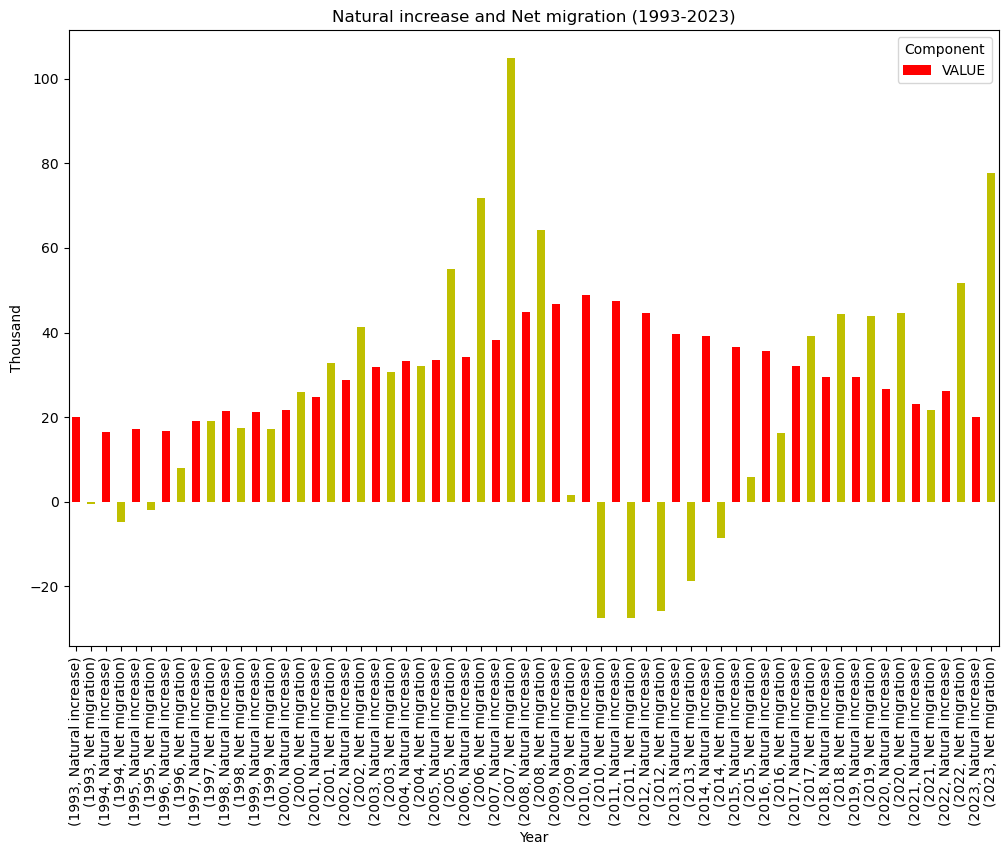

In [46]:
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Natural increase', 'Net migration']))
natural_increase_net_migration_display_data = data[filtre]
grouped_data = natural_increase_net_migration_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y'] #For values colors are assigned . Emigrants will showed by red color , immigrants will showed by yellow color .

grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Natural increase and Net migration (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.show()

Let's see ın last 30 years , 'Population Change and Immigrants ' together . We can see clearly what kind of correlation they have .

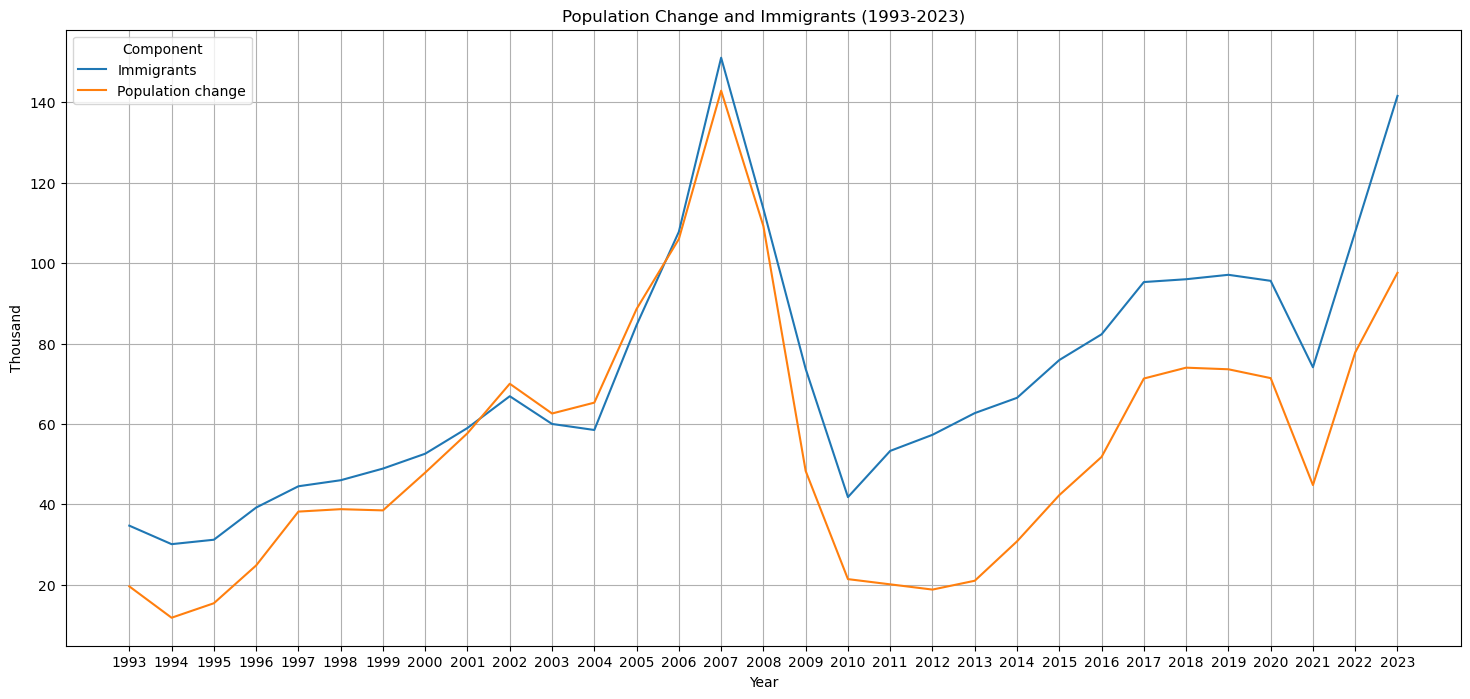

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Population change', 'Immigrants']))
population_change_immigrants_display_data = data[filtre]

plt.figure(figsize=(18, 8))
sns.lineplot(x='Year', y='VALUE', hue='Component', data=population_change_immigrants_display_data)
plt.title('Population Change and Immigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.grid(True)
plt.xticks(years)
plt.show()

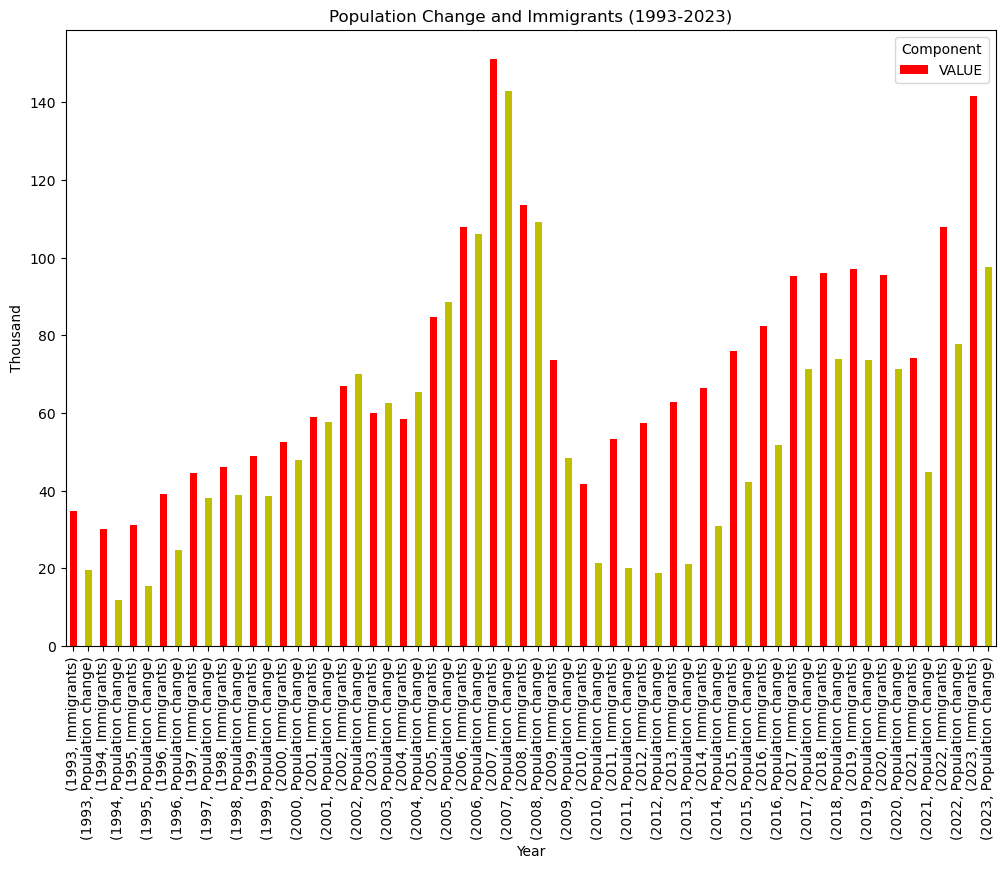

In [48]:
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Population change', 'Immigrants']))
population_change_immigrants_display_data = data[filtre]
grouped_data = population_change_immigrants_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y'] 
grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Population Change and Immigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.show()

Let's see ın last 30 years , 'Population Change and Emigrants  ' together . We can see clearly what kind of correlation they have .

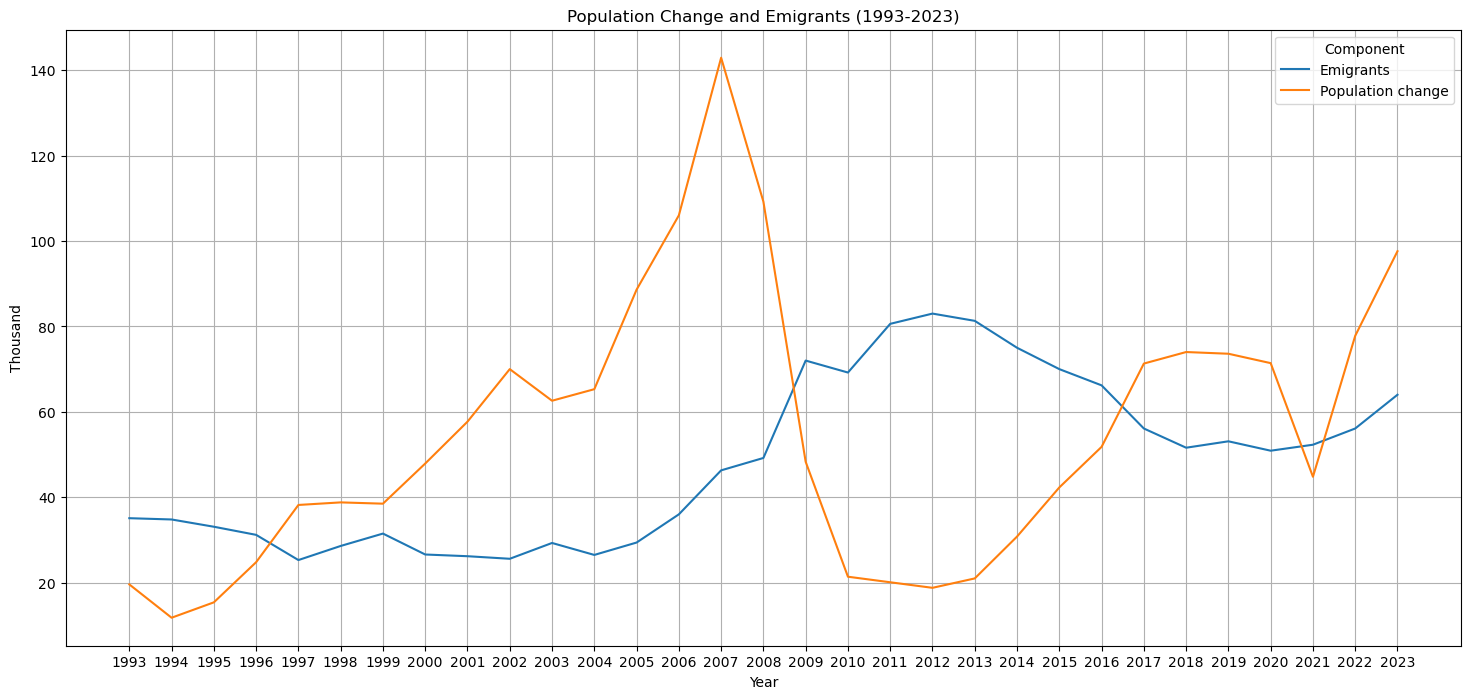

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Population change', 'Emigrants']))
population_change_emigrants_display_data = data[filtre]

plt.figure(figsize=(18, 8))
sns.lineplot(x='Year', y='VALUE', hue='Component', data=population_change_emigrants_display_data)
plt.title('Population Change and Emigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.grid(True)
plt.xticks(years)
plt.show()

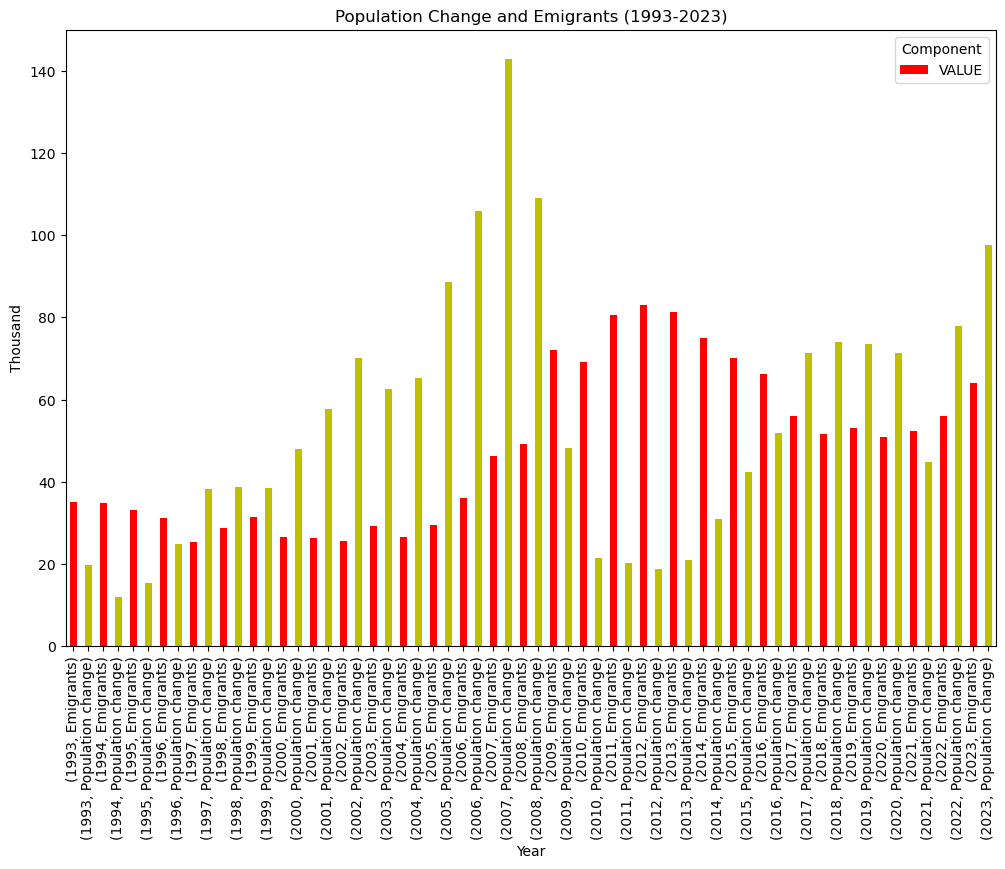

In [56]:
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Population change', 'Emigrants']))
population_change_emigrants_display_data = data[filtre]
grouped_data = population_change_emigrants_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y'] 
grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Population Change and Emigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.show()

After all displaying we can start finding our questions . We have already had a look in last 30 years what happened population . As our datas and displaying , Ireland population has grown up . That is obvious .In this case let's see how many people they have next year at 2024 . We have datas about last 30 years and we are gonna predict next year population now . We will use Machine learning solution ways . Lineer Regregssion method will be used for predict next year population .

In [59]:
import pandas as pd

In [60]:
data=pd.read_csv('PEA15.20231021T091018.csv')

In [61]:
pivoted_data = data.pivot(index='Year', columns='Component', values='VALUE').reset_index()

In [62]:
pivoted_data

Component,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
0,1993,50.4,30.4,35.1,34.7,20.0,-0.4,3574.1,19.6
1,1994,49.1,32.6,34.8,30.1,16.6,-4.7,3585.9,11.8
2,1995,48.4,31.2,33.1,31.2,17.2,-1.9,3601.3,15.4
3,1996,48.8,32.0,31.2,39.2,16.7,8.0,3626.1,24.8
4,1997,50.7,31.7,25.3,44.5,19.0,19.2,3664.3,38.2
5,1998,52.7,31.2,28.6,46.0,21.5,17.4,3703.1,38.8
6,1999,53.7,32.4,31.5,48.9,21.2,17.3,3741.6,38.5
7,2000,54.0,32.1,26.6,52.6,21.8,26.0,3789.5,47.9
8,2001,55.1,30.2,26.2,59.0,24.8,32.8,3847.2,57.7
9,2002,58.1,29.3,25.6,66.9,28.8,41.3,3917.2,70.0


In [63]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [64]:
df=pivoted_data

In [65]:
df

Component,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
0,1993,50.4,30.4,35.1,34.7,20.0,-0.4,3574.1,19.6
1,1994,49.1,32.6,34.8,30.1,16.6,-4.7,3585.9,11.8
2,1995,48.4,31.2,33.1,31.2,17.2,-1.9,3601.3,15.4
3,1996,48.8,32.0,31.2,39.2,16.7,8.0,3626.1,24.8
4,1997,50.7,31.7,25.3,44.5,19.0,19.2,3664.3,38.2
5,1998,52.7,31.2,28.6,46.0,21.5,17.4,3703.1,38.8
6,1999,53.7,32.4,31.5,48.9,21.2,17.3,3741.6,38.5
7,2000,54.0,32.1,26.6,52.6,21.8,26.0,3789.5,47.9
8,2001,55.1,30.2,26.2,59.0,24.8,32.8,3847.2,57.7
9,2002,58.1,29.3,25.6,66.9,28.8,41.3,3917.2,70.0


In [82]:
df.shape

(31, 9)

In [83]:
df.columns.values

array(['Year', 'Annual births', 'Annual deaths', 'Emigrants',
       'Immigrants', 'Natural increase', 'Net migration', 'Population',
       'Population change'], dtype=object)

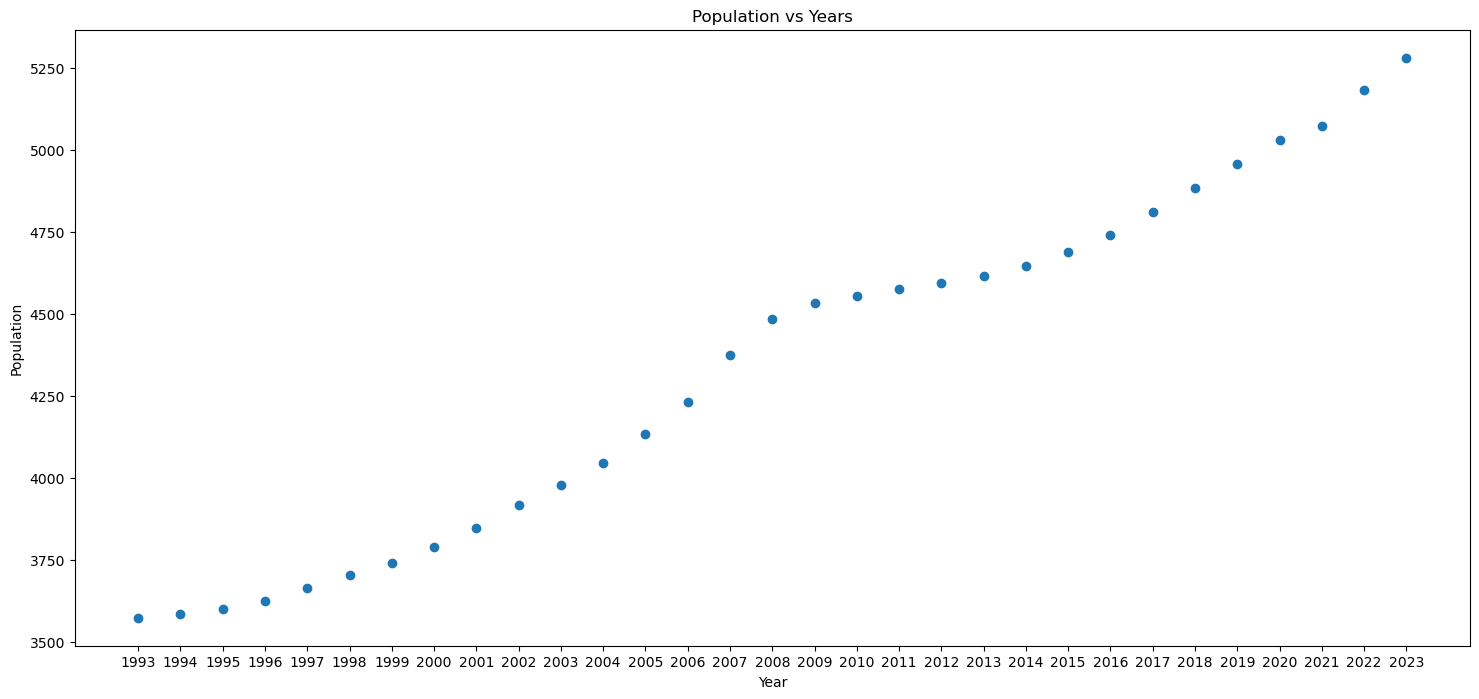

In [78]:

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
population = df['Population']
year = df['Year']
plt.scatter(year ,population)
plt.title("Population vs Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(year)
plt.show()

In [ ]:
#When we have a look scatter displaying , apperantly population has linear regression . Every year there is increasing and we can expect next year this increasing will be going .

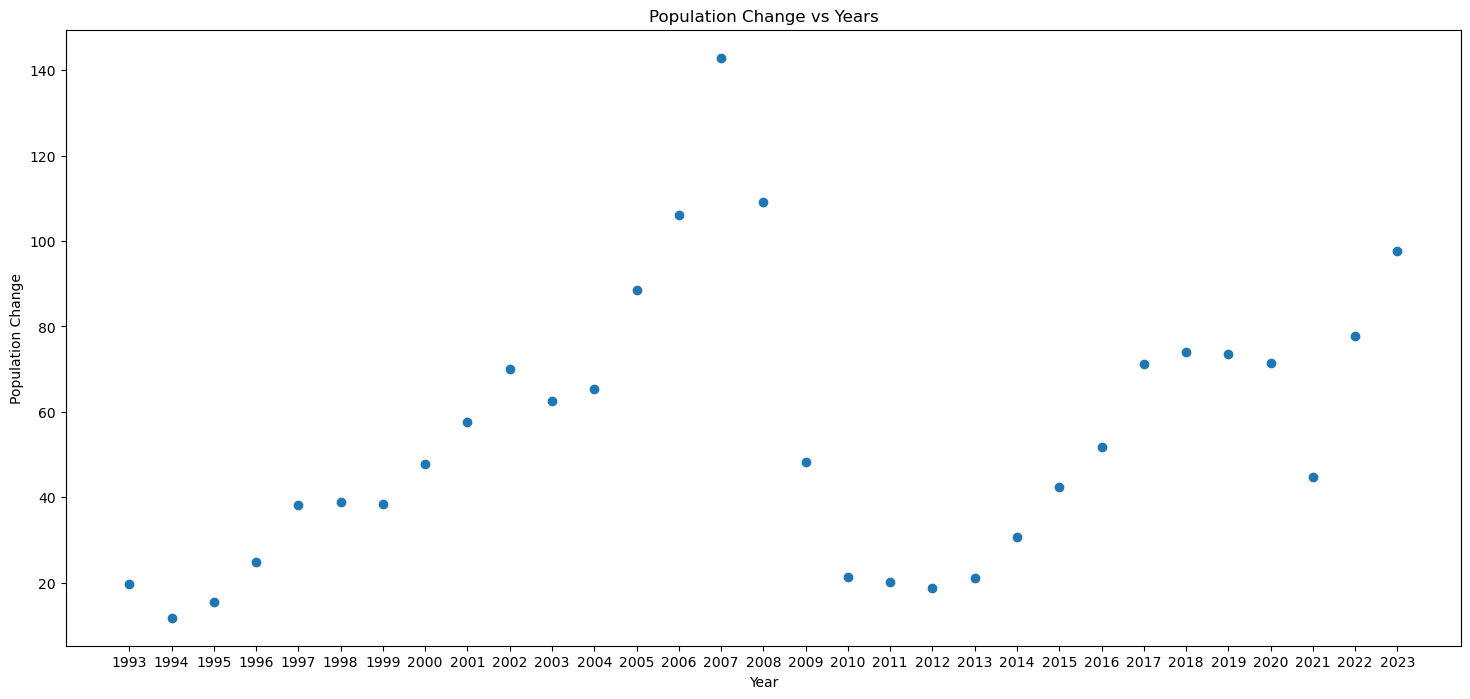

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
population_change = df['Population change']
year = df['Year']
plt.scatter(year ,population_change)
plt.title("Population Change vs Years")
plt.xlabel("Year")
plt.ylabel("Population Change")
plt.xticks(year)
plt.show()

In [ ]:
#Apperantly every year population change is positive but there is no strong correlation between years . If we need a sample , more than 140.000 people have changed population at 2007 but next 5 years population change is going down . By another explanation , from 2007 to 2013 , population change positive but not with increasing . Population change are going down but population is growing but not as before as 2003-2007 .  .  

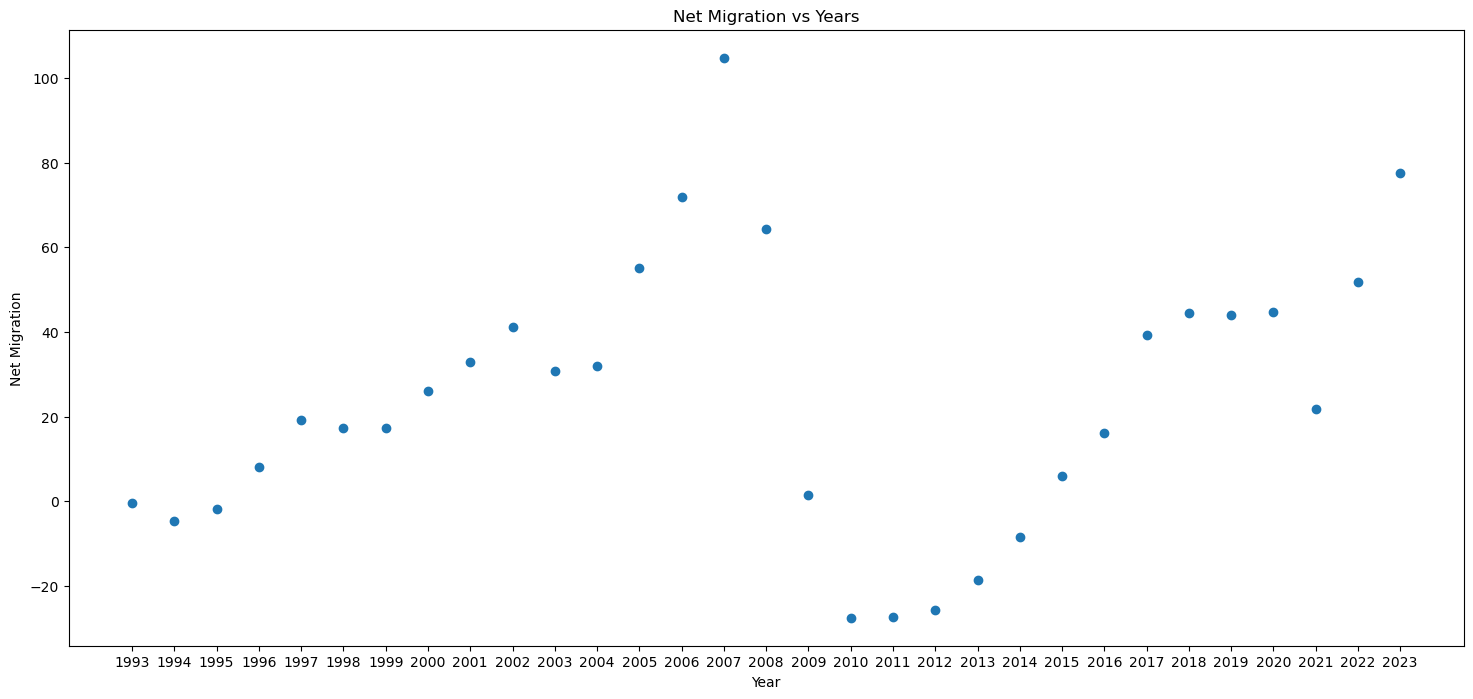

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8))
net_migration = df['Net migration']
year = df['Year']
plt.scatter(year ,net_migration)
plt.title("Net Migration vs Years")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.xticks(year)
plt.show()

In [81]:
#As population change there is no frequency and regular line between years but a few years net migration effected population being negative . 2010,2011,2012 are samples for cutting down on population increasing . 

In [84]:
#Let's check how strong relations do they have between columns characters . Because we need to see stronger one's to comment and for finding our way . 

In [85]:
correlation = df.corr()
correlation

Component,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
Component,,,,,,,,,
Year,1.000000,0.503623,0.195368,0.689090,0.654059,0.389302,0.211594,0.991982,0.332800
Annual births,0.503623,1.000000,-0.620756,0.757938,0.292815,0.986089,-0.175563,0.542585,0.126376
Annual deaths,0.195368,-0.620756,1.000000,-0.133276,0.030836,-0.742379,0.109816,0.171532,-0.117576
Emigrants,0.689090,0.757938,-0.133276,1.000000,0.239169,0.677125,-0.371898,0.724571,-0.166246
Immigrants,0.654059,0.292815,0.030836,0.239169,1.000000,0.243325,0.812386,0.673746,0.892619
Natural increase,0.389302,0.986089,-0.742379,0.677125,0.243325,1.000000,-0.174361,0.427784,0.131843
Net migration,0.211594,-0.175563,0.109816,-0.371898,0.812386,-0.174361,1.000000,0.209065,0.953096
Population,0.991982,0.542585,0.171532,0.724571,0.673746,0.427784,0.209065,1.000000,0.342066
Population change,0.332800,0.126376,-0.117576,-0.166246,0.892619,0.131843,0.953096,0.342066,1.000000


<Axes: xlabel='Component', ylabel='Component'>

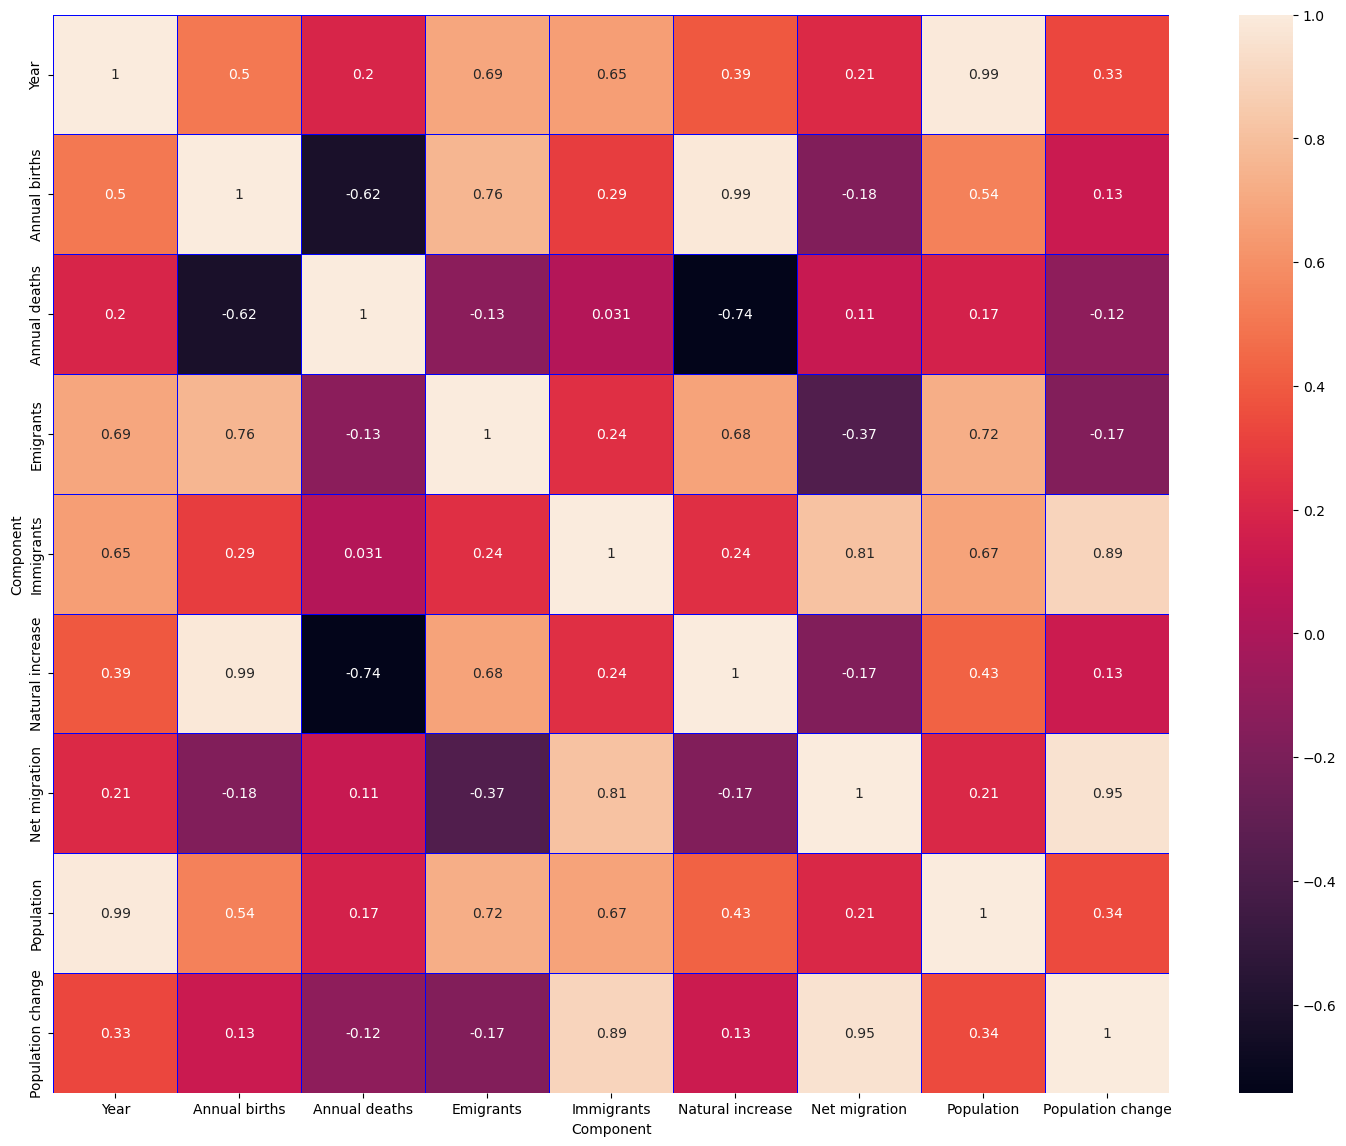

In [750]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

In [86]:
#Displaying has showing apperantly and we can read it at that , examples Year and Population have one of strongest relationship between of them by 0.99 . Annual births and Natural increase have also another strongest relationship between them by 0.99 . Net migration and population change have relationship between them by 0.95 . 

#Let's have a look this strong relationships by displaying .
First of all : "Population - Year"

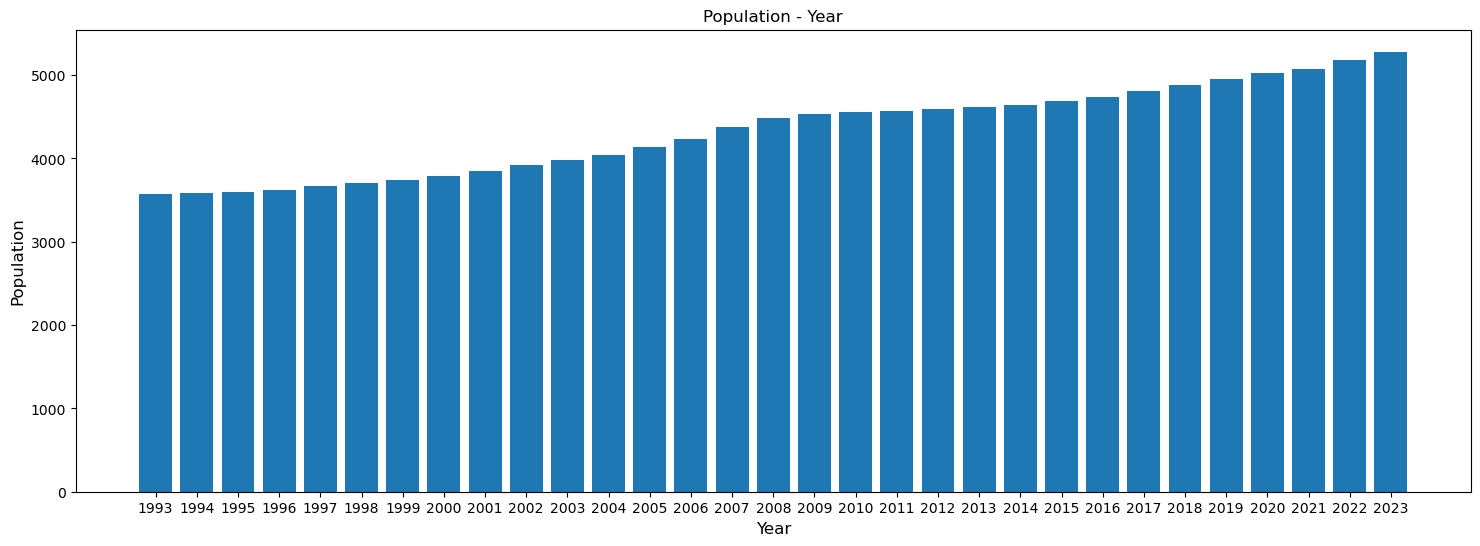

In [106]:
plt.figure(figsize=(18,6))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Population'].mean())
plt.xlabel("Year",fontsize=12)
plt.ylabel("Population",fontsize=12)
plt.title("Population - Year")
plt.xticks(years)

plt.show()

In [ ]:
#Let's have a look this strong relationships by displaying . First of all : "Natural Increase and Annual Births by Year"

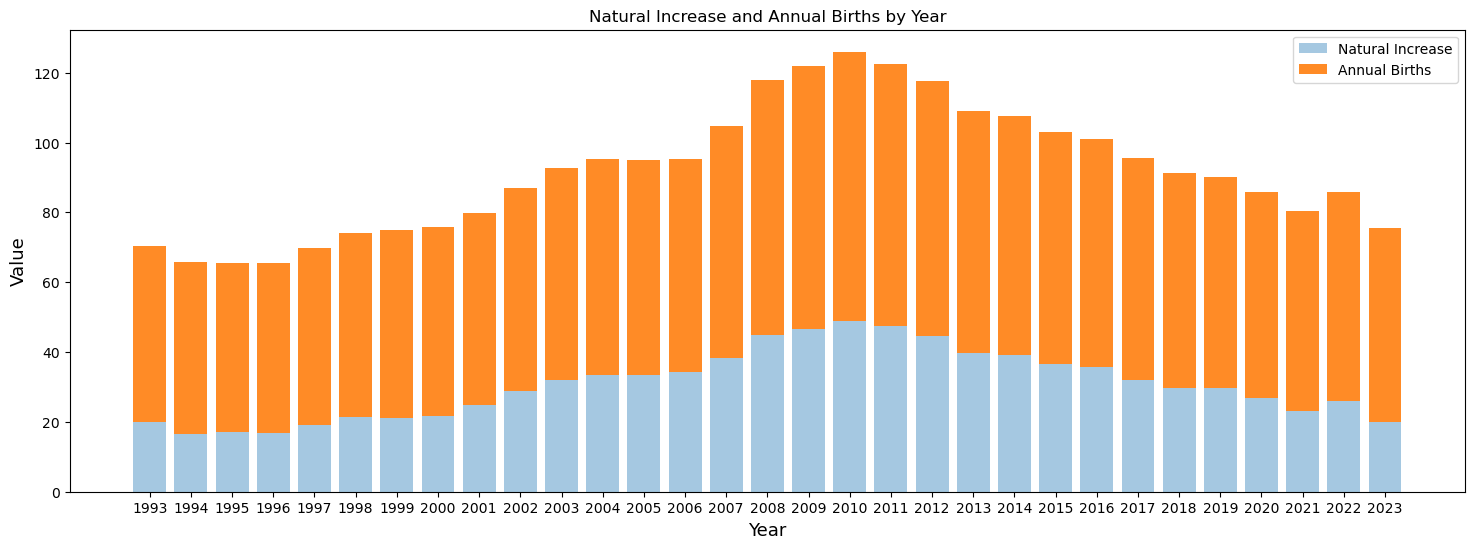

In [114]:
import matplotlib.pyplot as plt

years = df['Year'].unique()
natural_increase = df.groupby('Year')['Natural increase'].mean()
annual_births = df.groupby('Year')['Annual births'].mean()
plt.figure(figsize=(18, 6))
plt.bar(years, natural_increase, label='Natural Increase', alpha=0.4)
plt.bar(years, annual_births, label='Annual Births', alpha=0.9, bottom=natural_increase)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.title("Natural Increase and Annual Births by Year")
plt.xticks(years)
plt.legend()
plt.show()

In [ ]:
#Let's have a look this strong relationships by displaying . First of all : "Net migration and Population change"

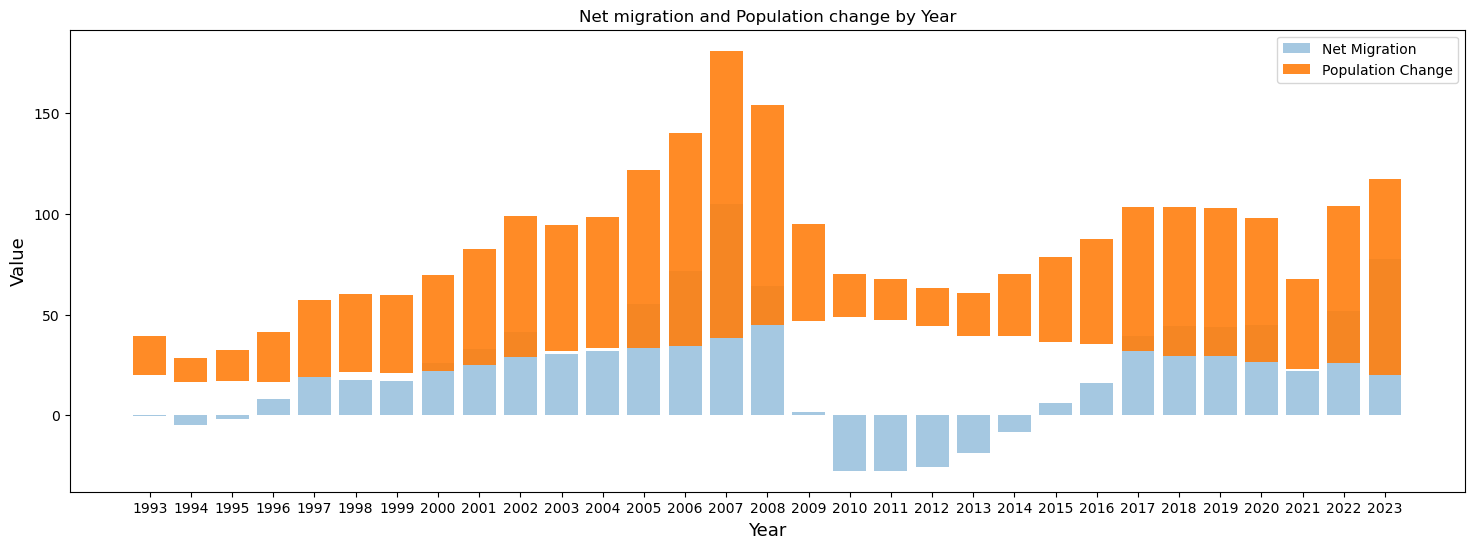

In [120]:
import matplotlib.pyplot as plt

years = df['Year'].unique()
net_migration = df.groupby('Year')['Net migration'].mean()
population_change = df.groupby('Year')['Population change'].mean()
plt.figure(figsize=(18, 6))
plt.bar(years, net_migration, label='Net Migration', alpha=0.4)
plt.bar(years, population_change, label='Population Change', alpha=0.9, bottom=natural_increase)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Value", fontsize=13)
plt.title("Net migration and Population change by Year")
plt.xticks(years)
plt.legend()
plt.show()

In [121]:
#And also let's see weak correlation and Year and Natural Increase are chosen to display . 

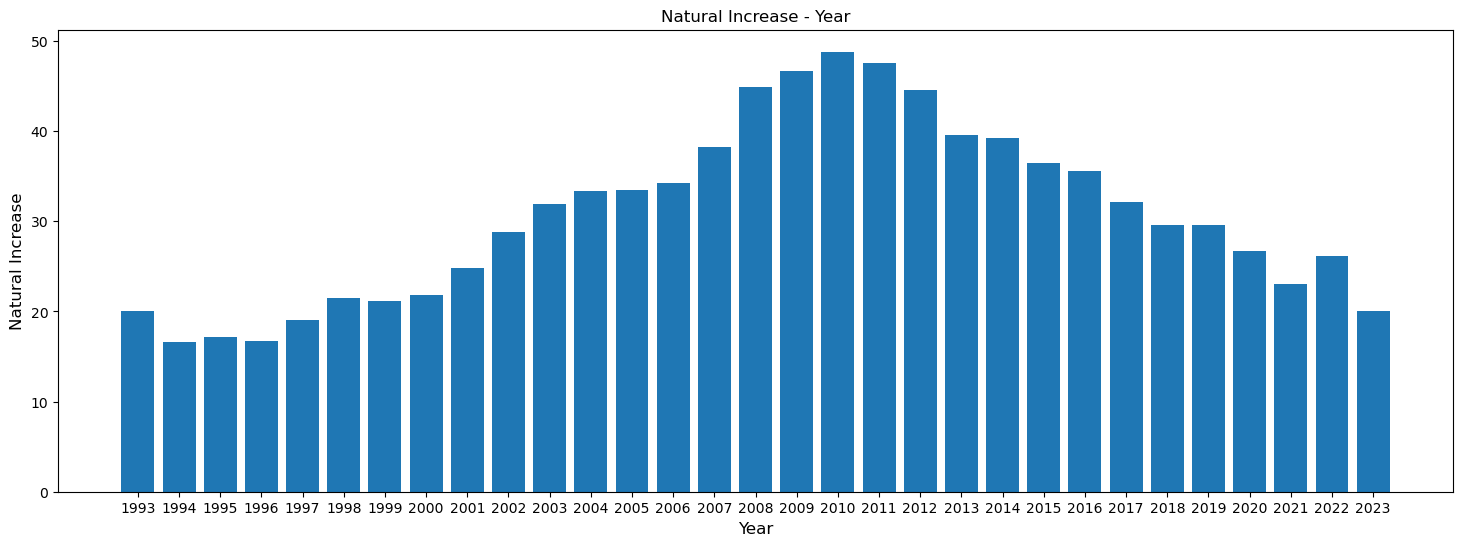

In [122]:
plt.figure(figsize=(18,6))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Natural increase'].mean())
plt.xlabel("Year",fontsize=12)
plt.ylabel("Natural Increase",fontsize=12)
plt.title("Natural Increase - Year")
plt.xticks(years)

plt.show()

In [123]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [124]:
df_scale.head(10)

Component,Year,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
0,-1.677051,-1.296915,-0.025165,-0.693434,-1.252970,-1.099956,-0.780727,-1.448552,-1.124839
1,-1.565248,-1.454770,1.047512,-0.709241,-1.405176,-1.452236,-0.916696,-1.426170,-1.373296
2,-1.453444,-1.539768,0.364899,-0.798809,-1.368779,-1.390069,-0.828158,-1.396960,-1.258624
3,-1.341641,-1.491198,0.754963,-0.898915,-1.104074,-1.441875,-0.515112,-1.349920,-0.959201
4,-1.229837,-1.260487,0.608689,-1.209771,-0.928707,-1.203568,-0.160960,-1.277464,-0.532364
5,-1.118034,-1.017634,0.364899,-1.035903,-0.879075,-0.944538,-0.217877,-1.203870,-0.513252
6,-1.006231,-0.896207,0.949996,-0.883109,-0.783120,-0.975622,-0.221039,-1.130845,-0.522808
7,-0.894427,-0.859779,0.803721,-1.141277,-0.660694,-0.913455,0.054061,-1.039991,-0.223385
8,-0.782624,-0.726210,-0.122682,-1.162352,-0.448930,-0.602620,0.269082,-0.930548,0.088779
9,-0.670820,-0.361930,-0.561504,-1.193965,-0.187535,-0.188172,0.537859,-0.797775,0.480577


In [153]:
y = df['Population']
X = df_scale.drop(['Population'],axis=1)

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [155]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24, 8)
(7, 8)
(24,)
(7,)


In [156]:
## Applying ML Models
## Linear regression

In [157]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [158]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [159]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.9949068182458822
-----Test set statistics-----
R-squared of the model in test set is: 0.9745443513436678
Root mean squared error of the prediction is: 75.45402807909686
Mean absolute percentage error of the prediction is: 1.385076432429659


In [132]:
y_preds_train

array([4844.69333281, 4140.9850146 , 3489.60646949, 3692.83255039,
       4446.18644365, 3741.37930326, 4229.40998154, 3996.79312211,
       4729.10089718, 3592.62144595, 3591.69522365, 4889.16157921,
       3608.05279178, 4689.08834568, 4931.14625104, 4572.69695254,
       5264.94279937, 4660.15097255, 3823.69186793, 4007.82783941,
       4385.17755519, 5020.90609872, 4587.47254532, 3778.38061667])

In [133]:
y_preds_test 

array([4986.09193808, 4344.00601446, 4781.61783703, 4446.66755929,
       3864.57365427, 3952.90486799, 5129.30348636])

In [134]:
## Ridge Regression

In [135]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [136]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

R-squared of the model in training set is: 0.9936533100778402
-----Test set statistics-----
R-squared of the model in test set is: 0.9744283390790041
Root mean squared error of the prediction is: 75.6257707439644
Mean absolute percentage error of the prediction is: 1.4870004091412972


In [137]:
## Lasso Regression

In [138]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [139]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

R-squared of the model in training set is: 0.9935546367113945
-----Test set statistics-----
R-squared of the model in test set is: 0.976346697390258
Root mean squared error of the prediction is: 72.73379351235056
Mean absolute percentage error of the prediction is: 1.4611057419041644


In [140]:
## Decision Tree Regressor

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [142]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [143]:
y_pred_DT = DTregressor.predict(X_test)

In [144]:
y_pred_DT

array([4810.9, 4375.8, 4687.8, 4574.9, 3789.5, 3979.9, 5074.7])

In [145]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9474947597794253
Root mean squared error of the prediction is: 108.36565744868496
Mean absolute percentage error of the prediction is: 1.9334241169129411


In [146]:
## Random Forest

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [148]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [149]:
y_pred_random = regressor.predict(X_test)

In [150]:
y_pred_random

array([4923.771, 4476.567, 4692.199, 4562.528, 3862.24 , 4007.568,
       4973.752])

In [151]:
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.9946654004543437
-----Test set statistics-----
R-squared of the model in test set is: 0.9576904256473082
Root mean squared error of the prediction is: 97.27688907957355
Mean absolute percentage error of the prediction is: 1.460512105816907


In [ ]:
#Let's have a look what kind of relationship we have between original data values and prediction values by regression models. We have already had taken prediction values and we are gonna show them together in below . 

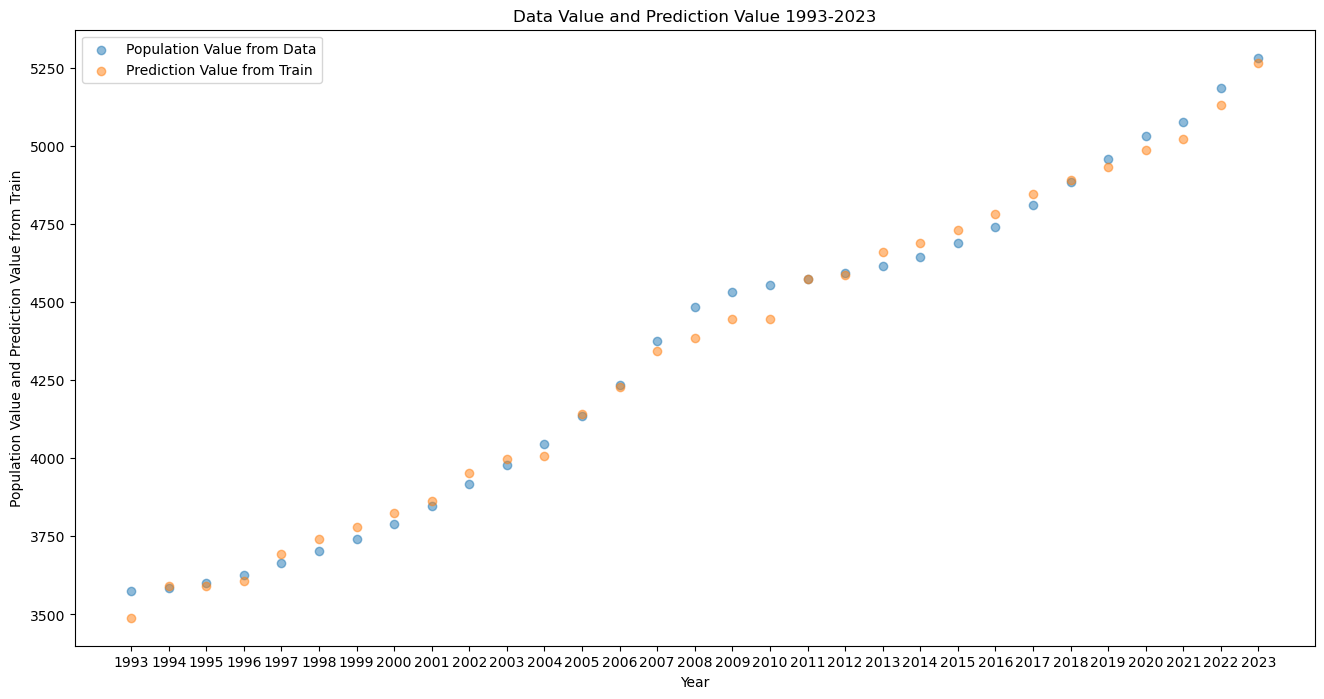

In [182]:
import matplotlib.pyplot as plt
population_value = [3574.1, 3585.9, 3601.3, 3626.1, 3664.3, 3703.1, 3741.6, 3789.5, 3847.2, 3917.2, 3979.9, 4045.2, 4133.8, 4232.9, 4375.8, 4485.1, 4533.4, 4554.8, 4574.9, 4593.7, 4614.7, 4645.4, 4687.8, 4739.6, 4810.9, 4884.9, 4958.5, 5029.9, 5074.7, 5184.0, 5281.6]
prediction_value = [4844.69333281, 4140.9850146 , 3489.60646949, 3692.83255039,
       4446.18644365, 3741.37930326, 4229.40998154, 3996.79312211,
       4729.10089718, 3592.62144595, 3591.69522365, 4889.16157921,
       3608.05279178, 4689.08834568, 4931.14625104, 4572.69695254,
       5264.94279937, 4660.15097255, 3823.69186793, 4007.82783941,
       4385.17755519, 5020.90609872, 4587.47254532, 3778.38061667 , 4986.09193808, 4344.00601446, 4781.61783703, 4446.66755929,
       3864.57365427, 3952.90486799, 5129.30348636]
prediction_value_regular = sorted(tahmin_verileri)
years = list(range(1993, 2024))
plt.figure(figsize=(16, 8))
plt.scatter(years, population_value, label='Population Value from Data', alpha=0.5)
plt.scatter(years, prediction_value_regular, label='Prediction Value from Train', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Population Value and Prediction Value from Train')
plt.title('Data Value and Prediction Value 1993-2023')
plt.legend()
plt.xticks(years)
plt.show()

In [190]:
from sklearn.linear_model import LinearRegression
population_value = [3574.1, 3585.9, 3601.3, 3626.1, 3664.3, 3703.1, 3741.6, 3789.5, 3847.2, 3917.2, 3979.9, 4045.2, 4133.8, 4232.9, 4375.8, 4485.1, 4533.4, 4554.8, 4574.9, 4593.7, 4614.7, 4645.4, 4687.8, 4739.6, 4810.9, 4884.9, 4958.5, 5029.9, 5074.7, 5184.0, 5281.6]
prediction_value = [4844.69333281, 4140.9850146 , 3489.60646949, 3692.83255039, 4446.18644365, 3741.37930326, 4229.40998154, 3996.79312211, 4729.10089718, 3592.62144595, 3591.69522365, 4889.16157921, 3608.05279178, 4689.08834568, 4931.14625104, 4572.69695254, 5264.94279937, 4660.15097255, 3823.69186793, 4007.82783941, 4385.17755519, 5020.90609872, 4587.47254532, 3778.38061667 , 4986.09193808, 4344.00601446, 4781.61783703, 4446.66755929, 3864.57365427, 3952.90486799, 5129.30348636]
model = LinearRegression()
model.fit([[x] for x in range(1993, 2024)], [[y] for y in population_value])
population_2024 = model.predict([[2024]])[0][0]
print(f"2024 Prediction Population: {population_2024:.2f}")

2024 Prediction Population: 5273.35
